### Bibliothèque

In [87]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import plotly.express as px
import sqlite3

### Import

In [88]:
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

In [89]:
conn = sqlite3.connect('/home/apprenant/Bureau/Box-Office/boxoffice/base.sqlite3')

In [90]:
# Écrivez votre requête SQL
query = "SELECT * FROM Film"

In [91]:
# Utilisez pandas pour lire les données de la table et les charger dans un DataFrame
df = pd.read_sql_query(query, conn)
df.head(1)

,id,title,release_date,genre,duration,director,producers,cast,nationality,distributor,box_office_title,box_office_first_week,press_eval,viewers_eval,views,budget
0,1,guardians of the galaxy vol. 3,2023-05-03,"Action, Fantastique, Science fiction",2h 30min,James Gunn,James Gunn,"Chris Pratt, Zoe Saldana, Dave Bautista",U.S.A.,The Walt Disney Company France,Box Office France,1323124.0,"3,6","4,2",251776.0,250000000.0


In [92]:
df = pd.read_csv('data_film.csv',index_col=0)
df.head()

,title,release_date,genre,duration,director,producers,cast,nationality,distributor,box_office_title,box_office_first_week,press_eval,viewers_eval,views,budget
0,guardians of the galaxy vol. 3,2023-05-03,"Action, Fantastique, Science fiction",2h 30min,James Gunn,James Gunn,"Chris Pratt, Zoe Saldana, Dave Bautista",U.S.A.,The Walt Disney Company France,Box Office France,1323124,"3,6","4,2",251776.0,250000000.0
1,sexygénaires,2023-06-14,Comédie,1h 20min,Robin Sykes,"Antoine Raimbault, Robin Sykes","Thierry Lhermitte, Patrick Timsit, Marie Bunel",France,Apollo Films / Orange Studio,Box Office France,63084,"2,8","2,6",25555.0,6000000.0
2,pornomelancolía,2023-06-21,Drame,1h 34min,Manuel Abramovich,"Manuel Abramovich, Fernando Krapp","Lalo Santos, Diablo, Brandon Ley",Argentine,Epicentre Films,Box Office France,3611,"3,5","2,6",6778.0,0.0
4,sick of myself,2023-05-31,Comédie dramatique,1h 37min,Kristoffer Borgli,Kristoffer Borgli,"Kristine Kujath Thorp, Eirik Sæther, Fanny Vaager",Norvège,Tandem,Box Office France,14638,"3,4","3,4",87714.0,0.0
5,la syndicaliste,2023-03-01,"Thriller, Drame",2h 01min,Jean-Paul Salomé,"Fadette Drouard, Jean-Paul Salomé","Isabelle Huppert, Grégory Gadebois, Yvan Attal",France,Le Pacte,Box Office France,192422,"3,3","3,9",182409.0,0.0


### Nettoyage

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7939 entries, 0 to 9113
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7939 non-null   object 
 1   release_date           7939 non-null   object 
 2   genre                  7939 non-null   object 
 3   duration               7939 non-null   object 
 4   director               7939 non-null   object 
 5   producers              7939 non-null   object 
 6   cast                   7939 non-null   object 
 7   nationality            7939 non-null   object 
 8   distributor            7939 non-null   object 
 9   box_office_title       7939 non-null   object 
 10  box_office_first_week  7939 non-null   int64  
 11  press_eval             7939 non-null   object 
 12  viewers_eval           7939 non-null   object 
 13  views                  7939 non-null   float64
 14  budget                 7939 non-null   object 
dtypes: f

In [94]:
df.columns

Index(['title', 'release_date', 'genre', 'duration', 'director', 'producers',
       'cast', 'nationality', 'distributor', 'box_office_title',
       'box_office_first_week', 'press_eval', 'viewers_eval', 'views',
       'budget'],
      dtype='object')

In [95]:
df.shape

(7939, 15)

In [96]:
df.dtypes

title                     object
release_date              object
genre                     object
duration                  object
director                  object
producers                 object
cast                      object
nationality               object
distributor               object
box_office_title          object
box_office_first_week      int64
press_eval                object
viewers_eval              object
views                    float64
budget                    object
dtype: object

In [97]:
df['viewers_eval'] = df['viewers_eval'].str.replace(',', '.')
df['viewers_eval'] = pd.to_numeric(df['viewers_eval'], errors='coerce').fillna(0).astype(float)

In [98]:
# Convert the 'viewers_eval' column to strings
df['press_eval'] = df['press_eval'].astype(str)

# Replace commas with dots in the 'press_eval' column
df['press_eval'] = df['press_eval'].str.replace(',', '.')

# Convert the 'press_eval' column to numeric
df['press_eval'] = pd.to_numeric(df['press_eval'], errors='coerce').fillna(0).astype(float)


In [99]:
# Convert the 'viewers_eval' column to strings
df['budget'] = df['budget'].astype(str)

# Replace commas with dots in the 'budget' column
df['budget'] = df['budget'].str.replace(',', '.')

# Convert the 'budget' column to numeric
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(float)

In [100]:
df.head()

,title,release_date,genre,duration,director,producers,cast,nationality,distributor,box_office_title,box_office_first_week,press_eval,viewers_eval,views,budget
0,guardians of the galaxy vol. 3,2023-05-03,"Action, Fantastique, Science fiction",2h 30min,James Gunn,James Gunn,"Chris Pratt, Zoe Saldana, Dave Bautista",U.S.A.,The Walt Disney Company France,Box Office France,1323124,3.6,4.2,251776.0,250000000.0
1,sexygénaires,2023-06-14,Comédie,1h 20min,Robin Sykes,"Antoine Raimbault, Robin Sykes","Thierry Lhermitte, Patrick Timsit, Marie Bunel",France,Apollo Films / Orange Studio,Box Office France,63084,2.8,2.6,25555.0,6000000.0
2,pornomelancolía,2023-06-21,Drame,1h 34min,Manuel Abramovich,"Manuel Abramovich, Fernando Krapp","Lalo Santos, Diablo, Brandon Ley",Argentine,Epicentre Films,Box Office France,3611,3.5,2.6,6778.0,0.0
4,sick of myself,2023-05-31,Comédie dramatique,1h 37min,Kristoffer Borgli,Kristoffer Borgli,"Kristine Kujath Thorp, Eirik Sæther, Fanny Vaager",Norvège,Tandem,Box Office France,14638,3.4,3.4,87714.0,0.0
5,la syndicaliste,2023-03-01,"Thriller, Drame",2h 01min,Jean-Paul Salomé,"Fadette Drouard, Jean-Paul Salomé","Isabelle Huppert, Grégory Gadebois, Yvan Attal",France,Le Pacte,Box Office France,192422,3.3,3.9,182409.0,0.0


In [101]:
df.dtypes

title                     object
release_date              object
genre                     object
duration                  object
director                  object
producers                 object
cast                      object
nationality               object
distributor               object
box_office_title          object
box_office_first_week      int64
press_eval               float64
viewers_eval             float64
views                    float64
budget                   float64
dtype: object

In [102]:
# vérification des doublons
print(df.duplicated().value_counts())

False    7939
dtype: int64


In [103]:
# vérification des données nulles
print(df.isna().sum())

title                    0
release_date             0
genre                    0
duration                 0
director                 0
producers                0
cast                     0
nationality              0
distributor              0
box_office_title         0
box_office_first_week    0
press_eval               0
viewers_eval             0
views                    0
budget                   0
dtype: int64


<AxesSubplot:>

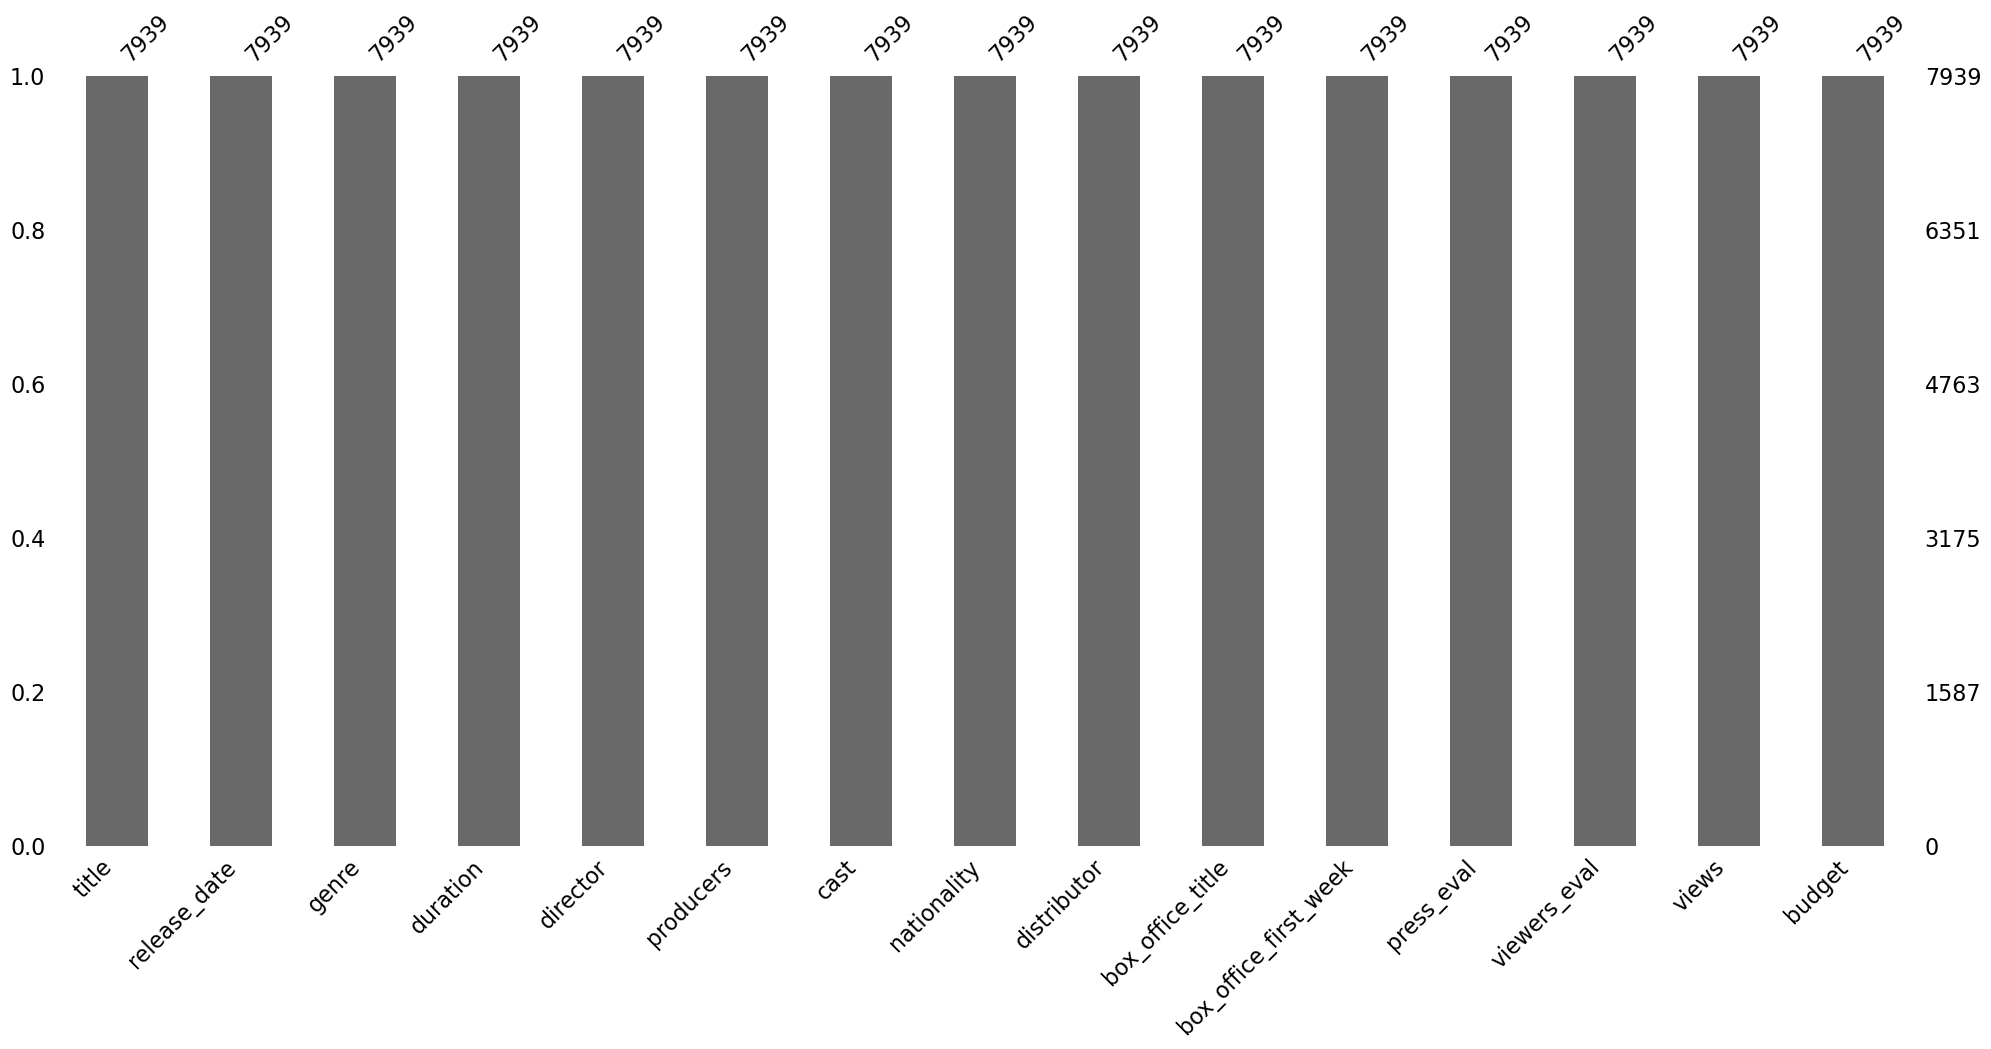

In [104]:
msno.bar(df)

In [105]:
# Modification du format de la date

df['release_date'] = pd.to_datetime(df['release_date'])

In [106]:
def duration_to_minutes(duration):
    # Split the string by 'h' and 'min'
    parts = duration.split('h')
    # Convert hours part to minutes
    hours = int(parts[0]) * 60 if len(parts) > 1 else 0
    # Extract minutes part and convert to integer
    minutes = int(parts[-1].replace('min', '').strip()) if 'min' in duration else 0
    # Calculate total minutes
    total_minutes = hours + minutes
    return total_minutes

# Assuming df is your DataFrame
df['duration_minutes'] = df['duration'].apply(duration_to_minutes)

In [107]:
def get_season(release_date):
    month = release_date.month
    if month >=3 and month <= 5:
        return "printemps"
    elif month >=6 and month <= 8:
        return "été"
    elif month >=9 and month <= 11:
        return "automne"
    else : 
        return "hiver"
    
df['season'] = df['release_date'].apply(get_season)

In [108]:
df.head(1)

,title,release_date,genre,duration,director,producers,cast,nationality,distributor,box_office_title,box_office_first_week,press_eval,viewers_eval,views,budget,duration_minutes,season
0,guardians of the galaxy vol. 3,2023-05-03,"Action, Fantastique, Science fiction",2h 30min,James Gunn,James Gunn,"Chris Pratt, Zoe Saldana, Dave Bautista",U.S.A.,The Walt Disney Company France,Box Office France,1323124,3.6,4.2,251776.0,250000000.0,150,printemps


### Exploration

#### Film

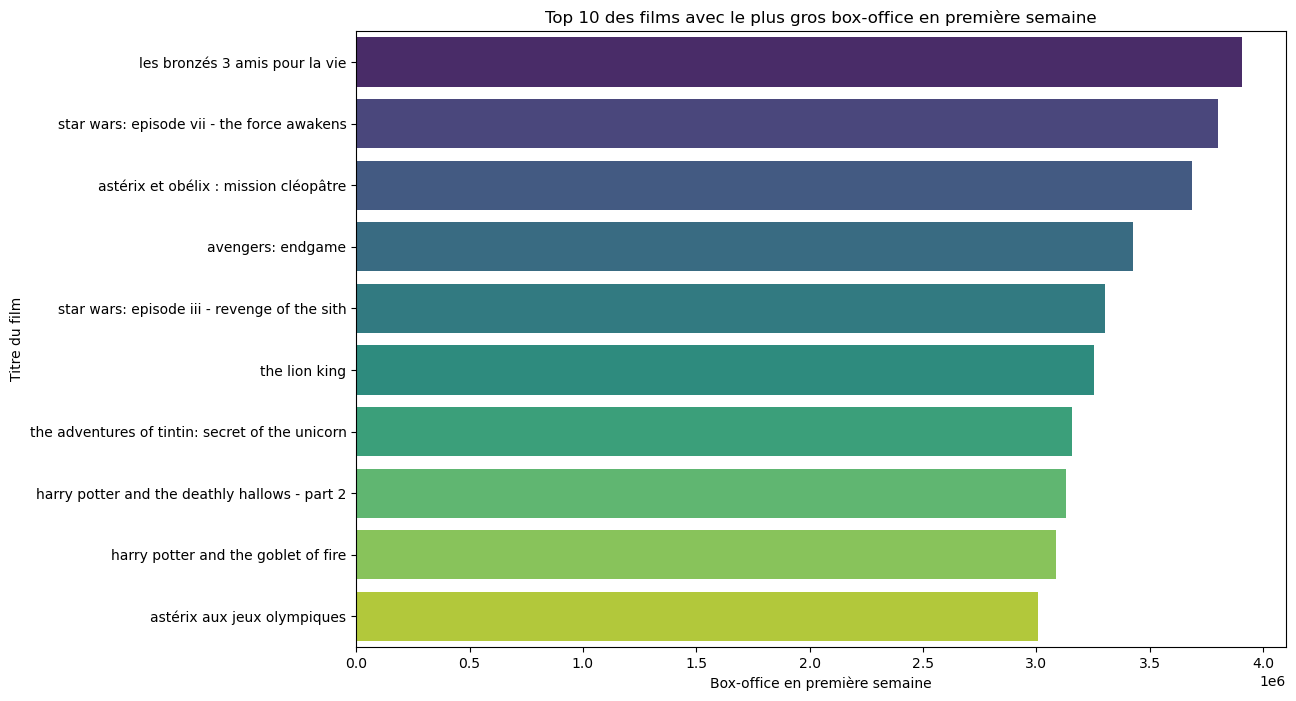

In [109]:
# Trier les données par box_office_first_week de manière décroissante
sorted_films = df.sort_values(by='box_office_first_week', ascending=False)

# Sélectionner les 10 premiers titres de films avec le plus gros box-office
top_films = sorted_films.head(10)

# Tracer le graphique
plt.figure(figsize=(12, 8))
sns.barplot(x='box_office_first_week', y='title', data=top_films, palette='viridis')
plt.title("Top 10 des films avec le plus gros box-office en première semaine")
plt.xlabel("Box-office en première semaine")
plt.ylabel("Titre du film")
plt.show()

#### Année

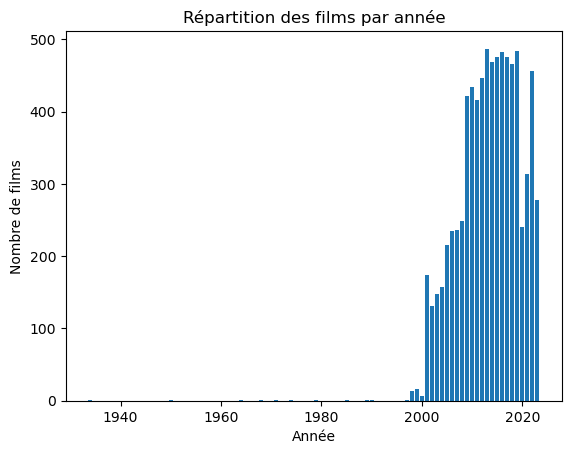

In [110]:
# Extraire l'année à partir de la colonne "release_date"
df['year'] = df['release_date'].dt.year

# Utiliser groupby() pour regrouper les films par année et compter le nombre de films dans chaque année
films_by_year = df.groupby('year').size()

# Tracer le graphique en utilisant matplotlib
plt.bar(films_by_year.index, films_by_year.values)
plt.xlabel('Année')
plt.ylabel('Nombre de films')
plt.title('Répartition des films par année')
plt.show()

In [111]:

df['release_date'] = pd.to_datetime(df['release_date'])

# Extraire l'année à partir de la colonne 'release_date'
df['year'] = df['release_date'].dt.year

# Trouver l'année la plus ancienne
oldest_year = df['year'].min()

# Trouver l'année la plus récente
newest_year = df['year'].max()

# Afficher les résultats
print(f"L'année la plus ancienne est : {oldest_year}")
print(f"L'année la plus récente est : {newest_year}")

L'année la plus ancienne est : 1934
L'année la plus récente est : 2023


#### Durée

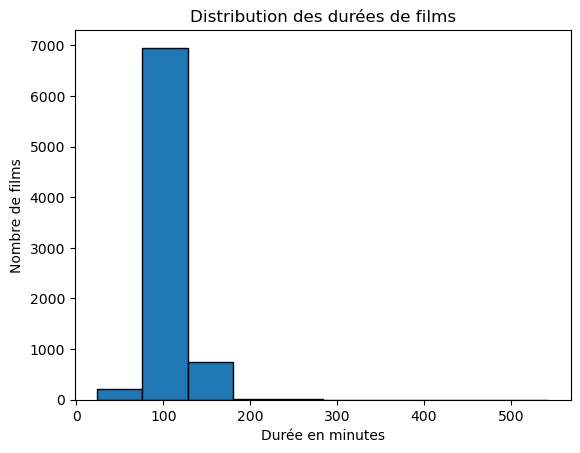

In [112]:
plt.hist(df['duration_minutes'], bins=10, edgecolor='black')


# Ajouter des étiquettes et un titre
plt.xlabel('Durée en minutes')
plt.ylabel('Nombre de films')
plt.title('Distribution des durées de films')

# Afficher le graphique
plt.show()

#### Nationalité

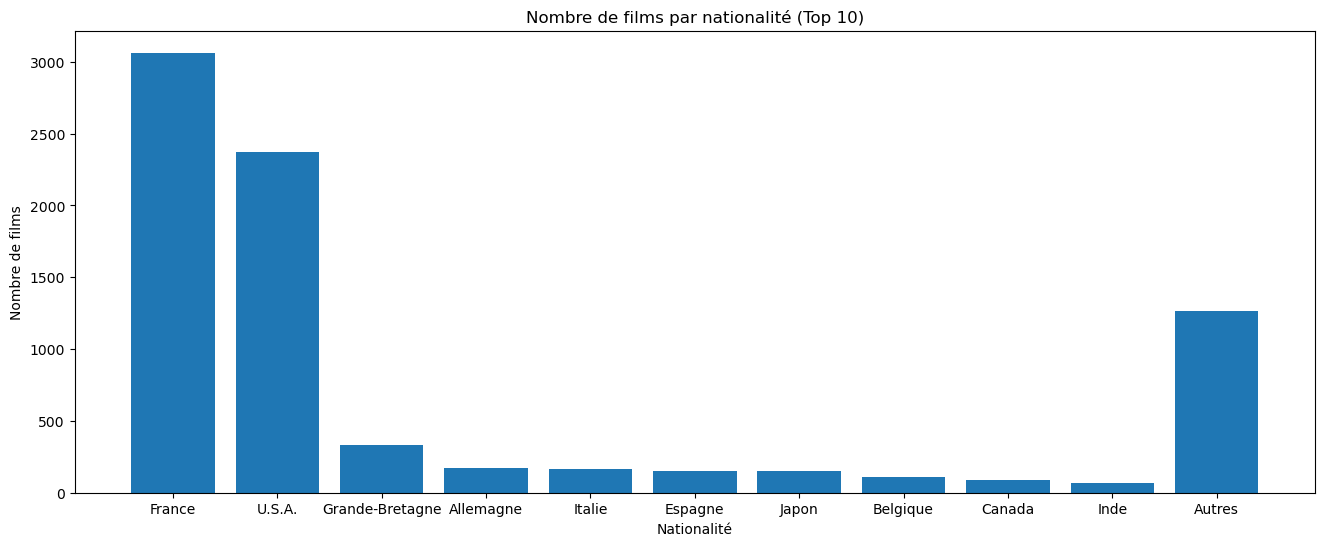

In [113]:
films_by_nation = df['nationality'].value_counts()

top_nations = films_by_nation[:10]
other_nations = films_by_nation[10:].sum()

# Ajouter la catégorie "autres" à la liste des 10 premières nations
top_nations['Autres'] = other_nations

plt.figure(figsize=(16,6))

# Créer un graphique à barres pour représenter le nombre de films par nationalité
plt.bar(top_nations.index, top_nations.values)

# Ajouter des étiquettes et un titre
plt.xlabel('Nationalité')
plt.ylabel('Nombre de films')
plt.title('Nombre de films par nationalité (Top 10)')

# Afficher le graphique
plt.show()

In [114]:
nationality_counts = df['nationality'].value_counts()

In [115]:
rare_nationalities = nationality_counts[nationality_counts < 5].index

In [116]:
df.loc[df['nationality'].isin(rare_nationalities), 'nationality'] = 'Autres'

#### Production

In [117]:
distributor  = pd.DataFrame(df['distributor'].value_counts())
distributor.head(10)

,distributor
Metropolitan FilmExport,410
Warner Bros. France,314
Universal Pictures International France,272
Pathé,268
Twentieth Century Fox France,238
SND,208
StudioCanal,204
Pyramide Distribution,199
Le Pacte,192
Sony Pictures Releasing France,188


In [118]:
companies_df = df['distributor'].apply(pd.Series)

# Compter le nombre d'occurrences de chaque compagnie de production
companies_count = companies_df.stack().value_counts()

# Top 10 des compagnies de production les plus fréquentes
top_companies = companies_count.nlargest(30)

top_companies

Metropolitan FilmExport                    410
Warner Bros. France                        314
Universal Pictures International France    272
Pathé                                      268
Twentieth Century Fox France               238
SND                                        208
StudioCanal                                204
Pyramide Distribution                      199
Le Pacte                                   192
Sony Pictures Releasing France             188
Mars Films                                 177
Wild Bunch Distribution                    166
ARP Sélection                              161
Bac Films                                  159
Paramount Pictures France                  150
Ad Vitam                                   142
Gaumont Distribution                       140
The Walt Disney Company France             136
Diaphana Distribution                      131
UGC Distribution                           131
Haut et Court                              118
EuropaCorp Di

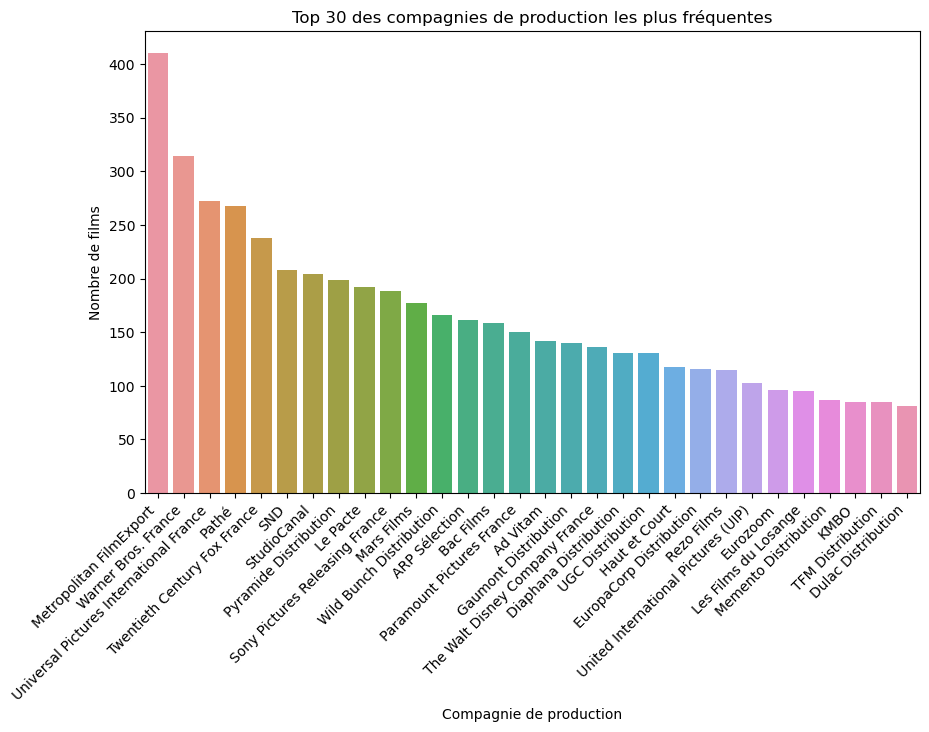

In [119]:
# Visualisation des compagnies de production les plus fréquentes
plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.index, y=top_companies.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Compagnie de production')
plt.ylabel('Nombre de films')
plt.title('Top 30 des compagnies de production les plus fréquentes')
plt.show()

Top 30 des compagnies ayant réalisé le plus d'entrées :
distributor
Warner Bros. France                        249091643.0
Metropolitan FilmExport                    189125506.0
Twentieth Century Fox France               164595582.0
Pathé                                      156049807.0
Universal Pictures International France    154592722.0
SND                                        151251577.0
Mars Films                                 143745405.0
The Walt Disney Company France             139787486.0
StudioCanal                                138429984.0
Sony Pictures Releasing France             136911812.0
Paramount Pictures France                  130465974.0
Gaumont Distribution                       106253653.0
Wild Bunch Distribution                     94828749.0
UGC Distribution                            91581607.0
EuropaCorp Distribution                     81537226.0
Le Pacte                                    74686402.0
Diaphana Distribution                       45005555

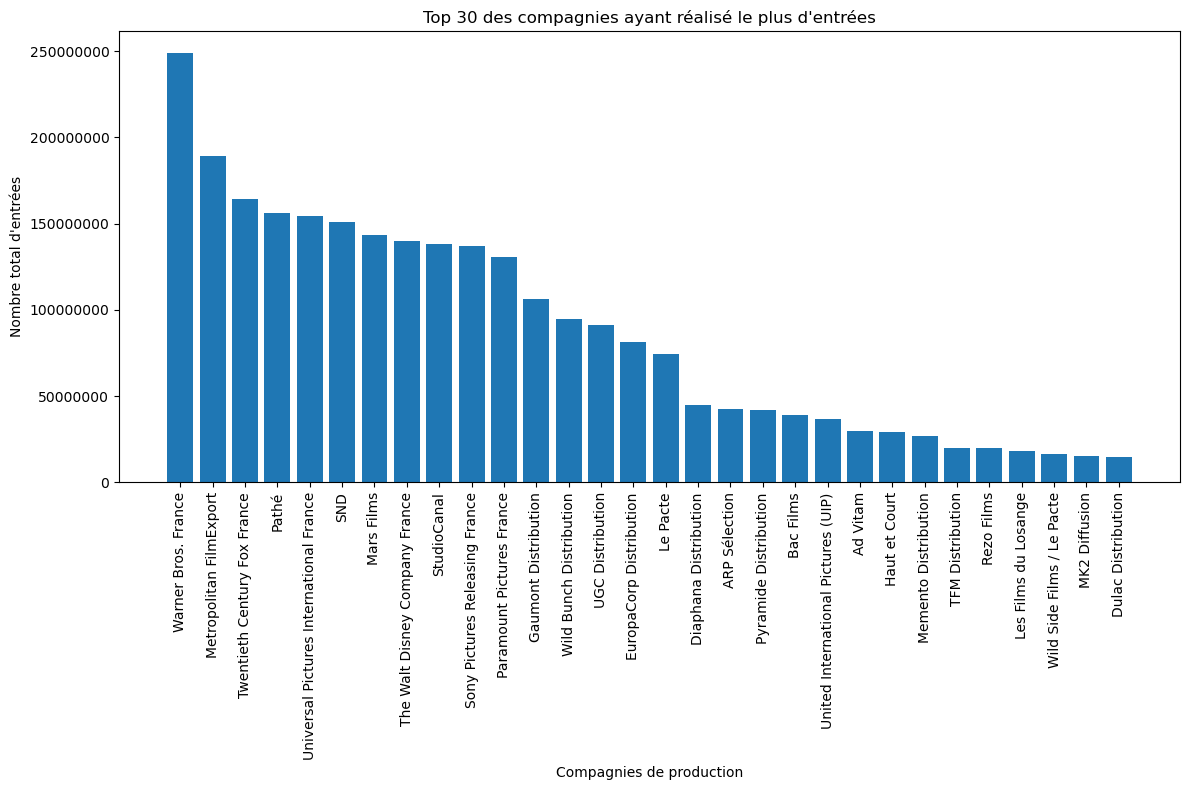

In [120]:
# Grouper le dataframe par compagnie de production et calculer le nombre total d'entrées pour chaque compagnie
companies_total_entries = df.groupby('distributor')['views'].sum()

# Top 30 des compagnies ayant réalisé le plus d'entrées
top_30_companies = companies_total_entries.nlargest(30)

print("Top 30 des compagnies ayant réalisé le plus d'entrées :")
print(top_30_companies)

# Créer un graphique barre pour visualiser le top 30 des compagnies ayant réalisé le plus d'entrées
plt.figure(figsize=(12, 8))
plt.bar(top_30_companies.index, top_30_companies.values)
plt.xlabel('Compagnies de production')
plt.ylabel('Nombre total d\'entrées')
plt.title('Top 30 des compagnies ayant réalisé le plus d\'entrées')
plt.xticks(rotation=90)
plt.ticklabel_format(style="plain", axis="y")  # Afficher les valeurs réelles sur l'axe des y
plt.tight_layout()
plt.show()

#### Acteur

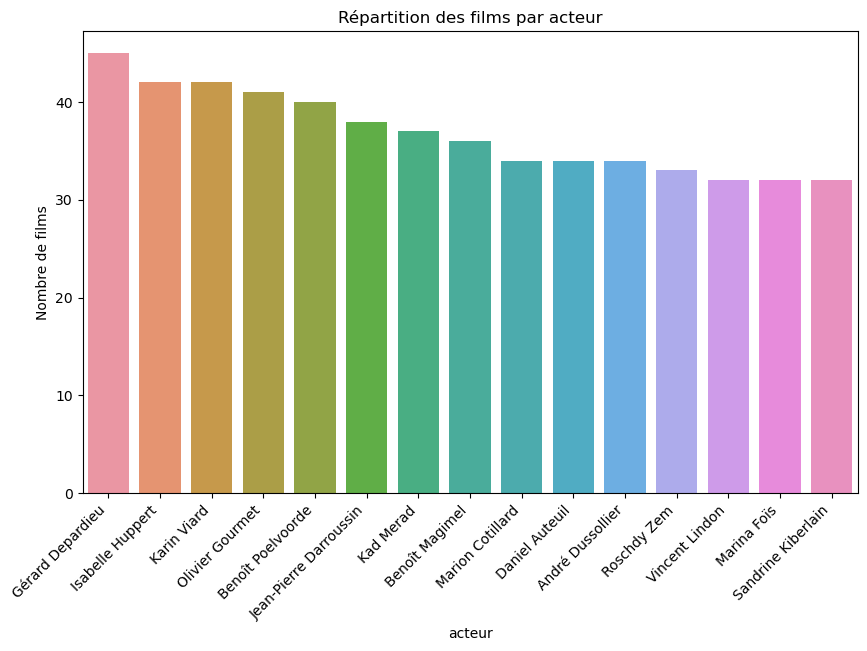

In [121]:
# Compter le nombre de films pour chaque acteur
acteurs_counts = df['cast'].str.split(', ', expand=True).stack().value_counts().head(15)

# Tracer le graphique à barres
plt.figure(figsize=(10, 6))
sns.barplot(x = acteurs_counts.index, y = acteurs_counts.values)
plt.xlabel('acteur')
plt.ylabel('Nombre de films')
plt.title('Répartition des films par acteur')
plt.xticks(rotation=45, ha='right')
plt.show()

In [122]:
# Explode the 'cast' column into separate rows while keeping other columns
df_exploded = pd.concat([df.drop(columns=['cast']), df['cast'].str.split(', ', expand=True)], axis=1)

# Group the DataFrame by actor and calculate the total views for each actor
actors_total_entries = df_exploded.melt(id_vars=df_exploded.columns[:-1], value_name='actor').dropna().groupby('actor')['views'].sum()

# Top 30 actors with the highest total views
top_30_actors = actors_total_entries.nlargest(30)

print("Top 30 actors with the highest total views:")
print(top_30_actors)

Top 30 actors with the highest total views:
actor
Emma Watson         15619385.0
Javier Bardem       15552527.0
Franck Dubosc       12111101.0
Seth MacFarlane     11988868.0
Ben Kingsley        11229513.0
Don Cheadle         10943418.0
Marina Foïs         10573209.0
Benoît Magimel       9657236.0
Taylor Lautner       9199050.0
Famke Janssen        9186287.0
Anne Le Ny           8792899.0
André Dussollier     8727688.0
Elie Semoun          8539896.0
Alexandra Lamy       8469490.0
Liam Hemsworth       8360135.0
Manu Payet           8246532.0
Fred Testot          7661528.0
 JoeyStarr           7451741.0
John Goodman         7390050.0
Kad Merad            7352244.0
Liam Neeson          7141533.0
Mark Strong          7090276.0
Peter Sarsgaard      7035074.0
Sigourney Weaver     6829373.0
Julie Ferrier        6704862.0
Sofia Vergara        6623855.0
Gad Elmaleh          6554034.0
Rachel Weisz         6533619.0
Olivier Gourmet      6515757.0
Gérard Darmon        6514066.0
Name: views, dtype: 

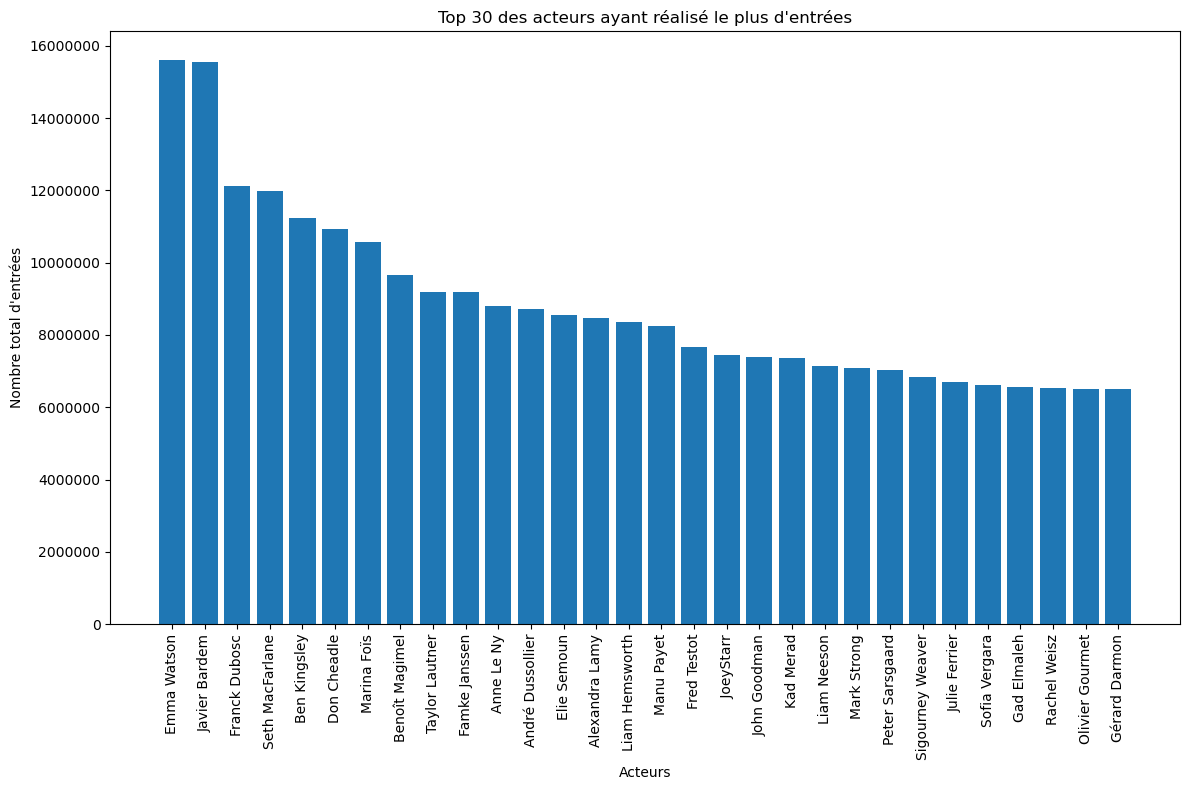

In [123]:
# Créer un graphique barre pour visualiser le top 30 des acteurs ayant réalisé le plus d'entrées
plt.figure(figsize=(12, 8))
plt.bar(top_30_actors.index, top_30_actors.values)
plt.xlabel('Acteurs')
plt.ylabel('Nombre total d\'entrées')
plt.title('Top 30 des acteurs ayant réalisé le plus d\'entrées')
plt.xticks(rotation=90)
plt.ticklabel_format(style="plain", axis="y")  # Afficher les valeurs réelles sur l'axe des y
plt.tight_layout()
plt.show()

#### Genre

In [124]:
# Harmonisation des intitulés des genres

def replace_drama(genres_list):
    if 'Drama' in genres_list:
        genres_list = [genre.replace('Drama', 'Drame') for genre in genres_list]
    return genres_list

# Appliquer la fonction personnalisée sur la colonne "genres"
df['genre'] = df['genre'].str.split(', ').apply(replace_drama).str.join(', ')

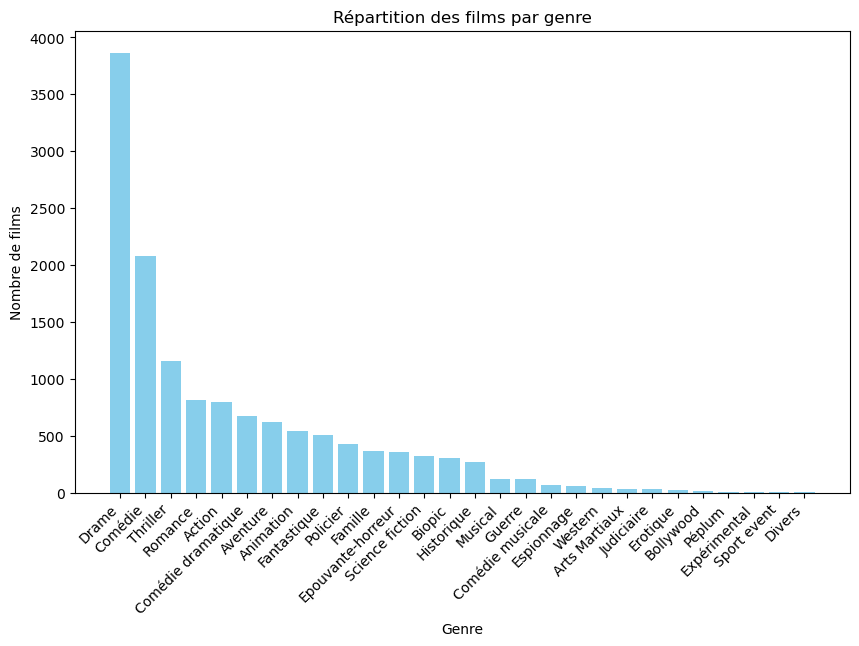

In [125]:
# Compter le nombre de films pour chaque genre
genres_counts = df['genre'].str.split(', ', expand=True).stack().value_counts()

# Tracer le graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(genres_counts.index, genres_counts.values, color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Nombre de films')
plt.title('Répartition des films par genre')
plt.xticks(rotation=45, ha='right')
plt.show()

In [126]:

genres_counts

Drame                 3866
Comédie               2080
Thriller              1155
Romance                817
Action                 793
Comédie dramatique     671
Aventure               623
Animation              544
Fantastique            508
Policier               425
Famille                368
Epouvante-horreur      362
Science fiction        323
Biopic                 303
Historique             267
Musical                123
Guerre                 116
Comédie musicale        70
Espionnage              63
Western                 37
Arts Martiaux           35
Judiciaire              33
Erotique                20
Bollywood               19
Péplum                  10
Expérimental             6
Sport event              3
Divers                   2
dtype: int64

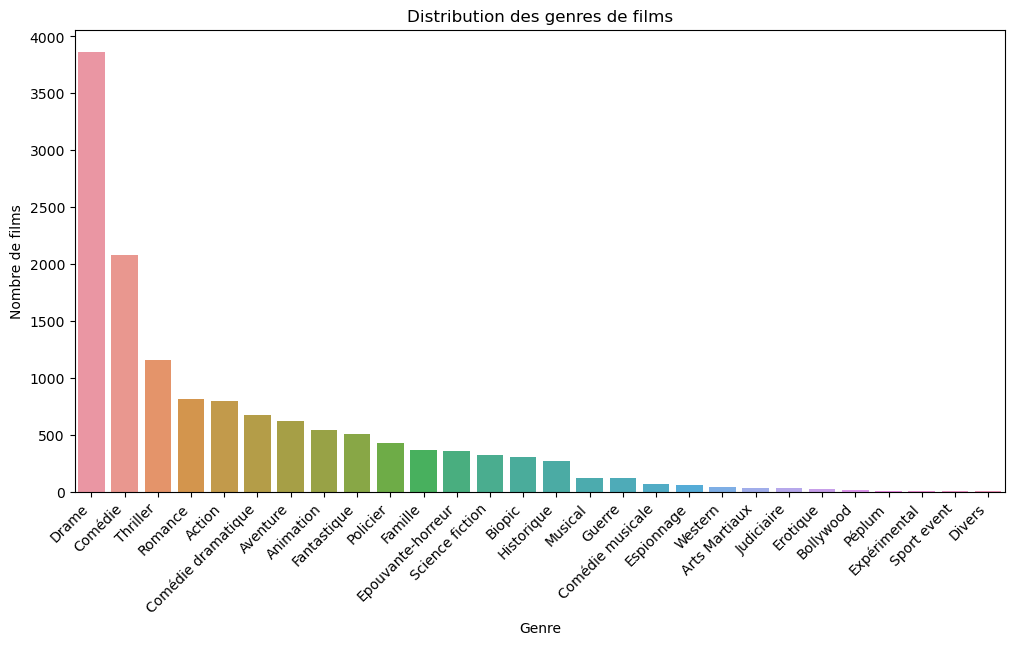

In [127]:


# Supprimer l'entrée vide dans le résultat du comptage
genres_counts = genres_counts[genres_counts.index != '']

# Créer le barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=genres_counts.index, y=genres_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Nombre de films')
plt.title('Distribution des genres de films')
plt.show()

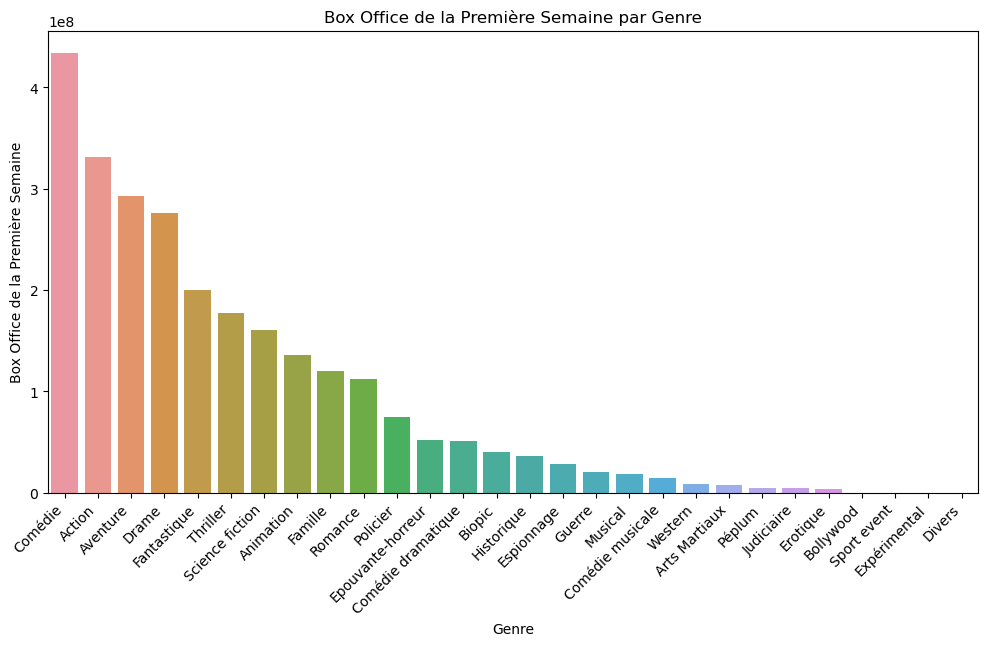

In [128]:
# Vérifier les types de données et nettoyer si nécessaire
df['box_office_first_week'] = pd.to_numeric(df['box_office_first_week'], errors='coerce')

# Séparer les genres multiples en plusieurs lignes
df['genre'] = df['genre'].str.split(', ')
df = df.explode('genre')

# Grouper les données par genre et calculer le box-office total de la première semaine pour chaque genre
boxoffice_first_week_by_genre = df.groupby('genre')['box_office_first_week'].sum()

# Supprimer les genres vides
boxoffice_first_week_by_genre = boxoffice_first_week_by_genre[boxoffice_first_week_by_genre.index != '']

# Trier les genres par box-office de la première semaine pour un affichage plus clair
boxoffice_first_week_by_genre = boxoffice_first_week_by_genre.sort_values(ascending=False)

# Créer le barplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=boxoffice_first_week_by_genre.index, y=boxoffice_first_week_by_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Box Office de la Première Semaine')
plt.title('Box Office de la Première Semaine par Genre')
plt.show()


#### Budget

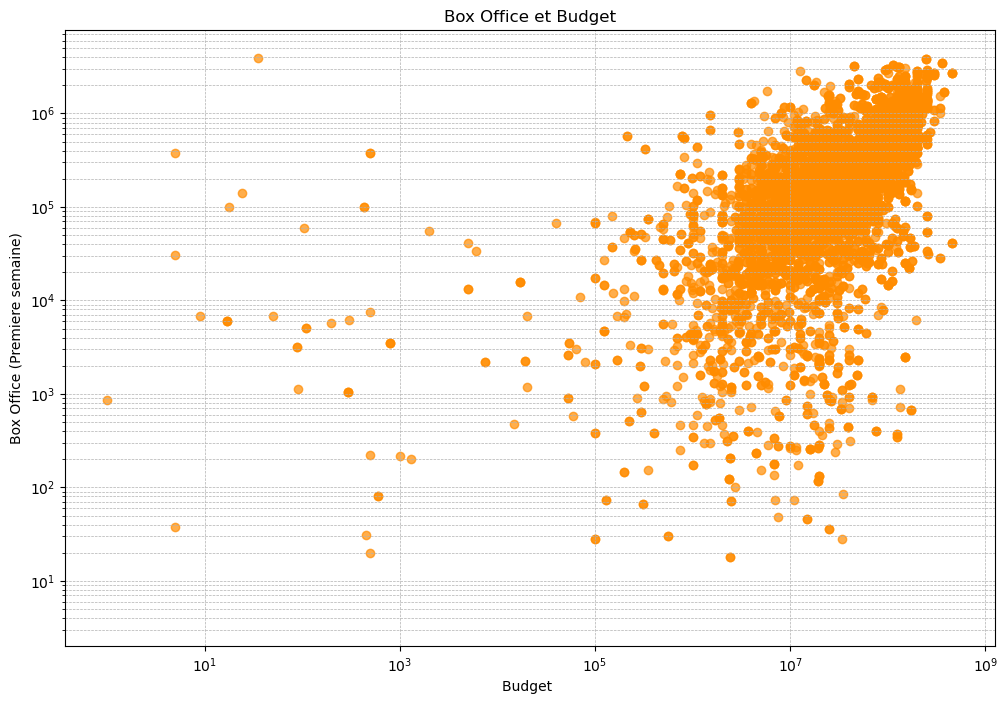

In [129]:
# Convert 'box_office_first_week' and 'budget' to numeric values
df['box_office_first_week'] = pd.to_numeric(df['box_office_first_week'], errors='coerce')
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

# Create a scatter plot for box office earnings vs. budget
plt.figure(figsize=(12, 8))
plt.scatter(df['budget'], df['box_office_first_week'], color='darkorange', alpha=0.7)
plt.title('Box Office et Budget')
plt.xlabel('Budget ')
plt.ylabel('Box Office (Premiere semaine)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

<AxesSubplot:xlabel='budget', ylabel='Count'>

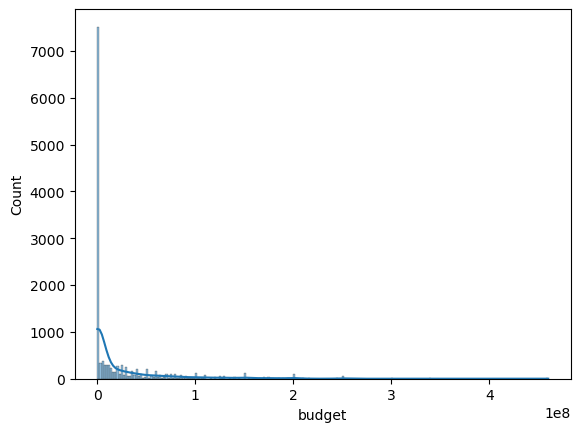

In [130]:
sns.histplot(df["budget"], kde = True)

In [131]:
budget_null = df[df['budget'] == 0.0]
budget_null.head()

,title,release_date,genre,duration,director,producers,cast,nationality,distributor,box_office_title,box_office_first_week,press_eval,viewers_eval,views,budget,duration_minutes,season,year
2,pornomelancolía,2023-06-21,Drame,1h 34min,Manuel Abramovich,"Manuel Abramovich, Fernando Krapp","Lalo Santos, Diablo, Brandon Ley",Argentine,Epicentre Films,Box Office France,3611,3.5,2.6,6778.0,0.0,94,été,2023
4,sick of myself,2023-05-31,Comédie dramatique,1h 37min,Kristoffer Borgli,Kristoffer Borgli,"Kristine Kujath Thorp, Eirik Sæther, Fanny Vaager",Norvège,Tandem,Box Office France,14638,3.4,3.4,87714.0,0.0,97,printemps,2023
5,la syndicaliste,2023-03-01,Thriller,2h 01min,Jean-Paul Salomé,"Fadette Drouard, Jean-Paul Salomé","Isabelle Huppert, Grégory Gadebois, Yvan Attal",France,Le Pacte,Box Office France,192422,3.3,3.9,182409.0,0.0,121,printemps,2023
5,la syndicaliste,2023-03-01,Drame,2h 01min,Jean-Paul Salomé,"Fadette Drouard, Jean-Paul Salomé","Isabelle Huppert, Grégory Gadebois, Yvan Attal",France,Le Pacte,Box Office France,192422,3.3,3.9,182409.0,0.0,121,printemps,2023
9,tout simplement noir,2020-07-08,Comédie,1h 30min,Jean-Pascal Zadi,"John Wax, Kamel Guemra, Jean-Pascal Zadi","Jean-Pascal Zadi, Caroline Anglade, Fary",France,Gaumont Distribution,Box Office France,255537,3.8,2.8,642294.0,0.0,90,été,2020


In [132]:
# Compter le nombre de valeurs égales à 0.0 dans la colonne 'budget'
nombre_de_valeurs_zero = df[df['budget'] == 0.0].shape[0]
print(f"Nombre de valeurs à 0.0 dans la colonne 'budget' : {nombre_de_valeurs_zero}")


Nombre de valeurs à 0.0 dans la colonne 'budget' : 7066


In [133]:
df.shape

(13642, 18)

count    1.364200e+04
mean     2.372259e+07
std      4.630040e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.600000e+07
max      4.600000e+08
Name: budget, dtype: float64


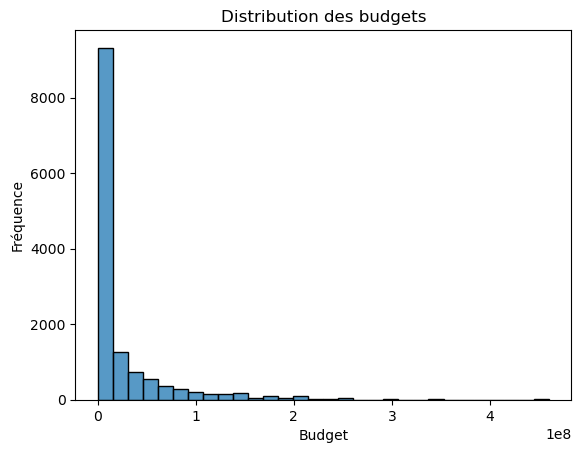

In [134]:
# Afficher des statistiques descriptives
print(df['budget'].describe())

sns.histplot(df['budget'], bins=30)
plt.title('Distribution des budgets')
plt.xlabel('Budget')
plt.ylabel('Fréquence')
plt.show()

In [135]:
# Calculer la médiane de la colonne 'budget' en excluant les valeurs à 0
median_budget = df[df['budget'] != 0.0]['budget'].median()

# Remplacer les valeurs à 0 par la médiane
df['budget'] = df['budget'].replace(0.0, median_budget)
print("Les valeurs à 0 ont été remplacées par la médiane.")

Les valeurs à 0 ont été remplacées par la médiane.


In [136]:
# Compter le nombre de valeurs égales à 0.0 dans la colonne 'budget'
nombre_de_valeurs_zero = df[df['budget'] == 0.0].shape[0]
print(f"Nombre de valeurs à 0.0 dans la colonne 'budget' : {nombre_de_valeurs_zero}")

Nombre de valeurs à 0.0 dans la colonne 'budget' : 0


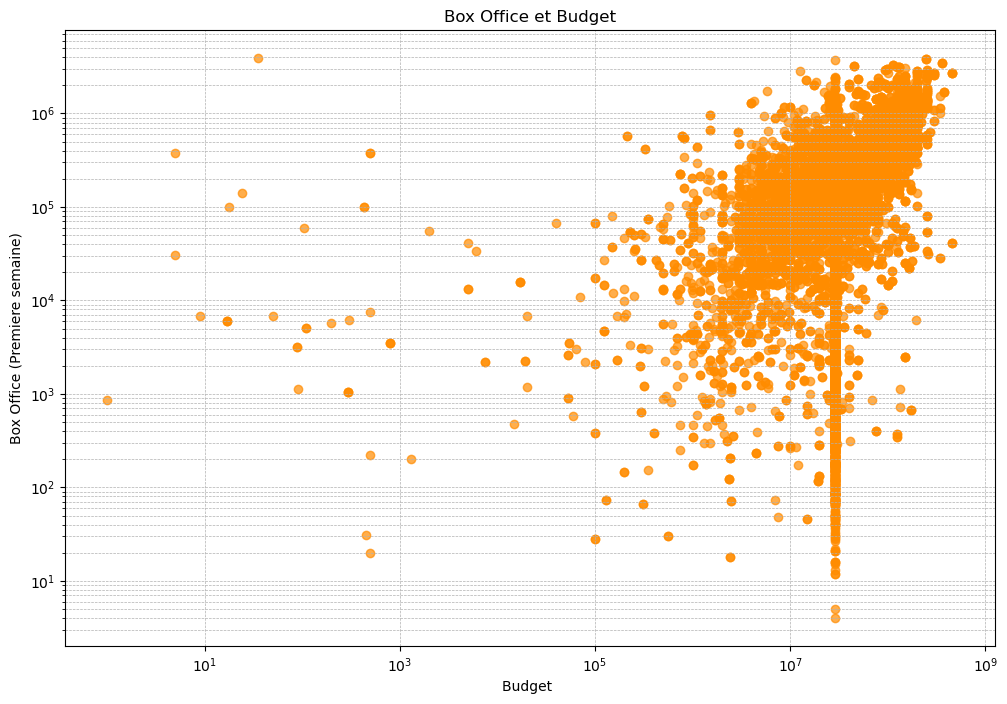

In [173]:
# Create a scatter plot for box office earnings vs. budget
plt.figure(figsize=(12, 8))
plt.scatter(df['budget'], df['box_office_first_week'], color='darkorange', alpha=0.7)
plt.title('Box Office et Budget')
plt.xlabel('Budget ')
plt.ylabel('Box Office (Premiere semaine)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

#### Vues

<AxesSubplot:xlabel='views', ylabel='Count'>

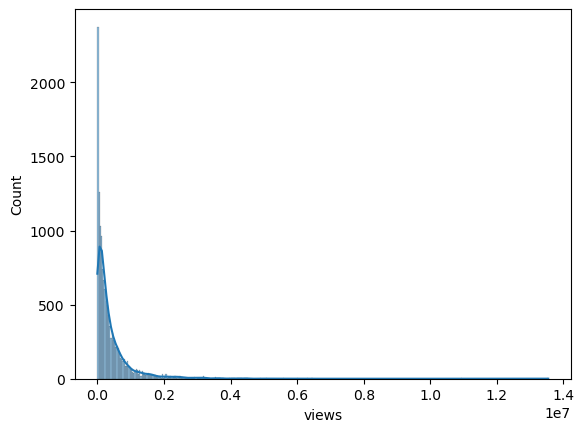

In [137]:
sns.histplot(df["views"], kde = True)

In [138]:
# Supposons que df est votre DataFrame et 'col' est la colonne que vous souhaitez vérifier
views_null = df[df['views'] == 0]

# Afficher le DataFrame filtré
views_null.value_counts()

Series([], dtype: int64)

#### Evaluation Presse et Spectateurs

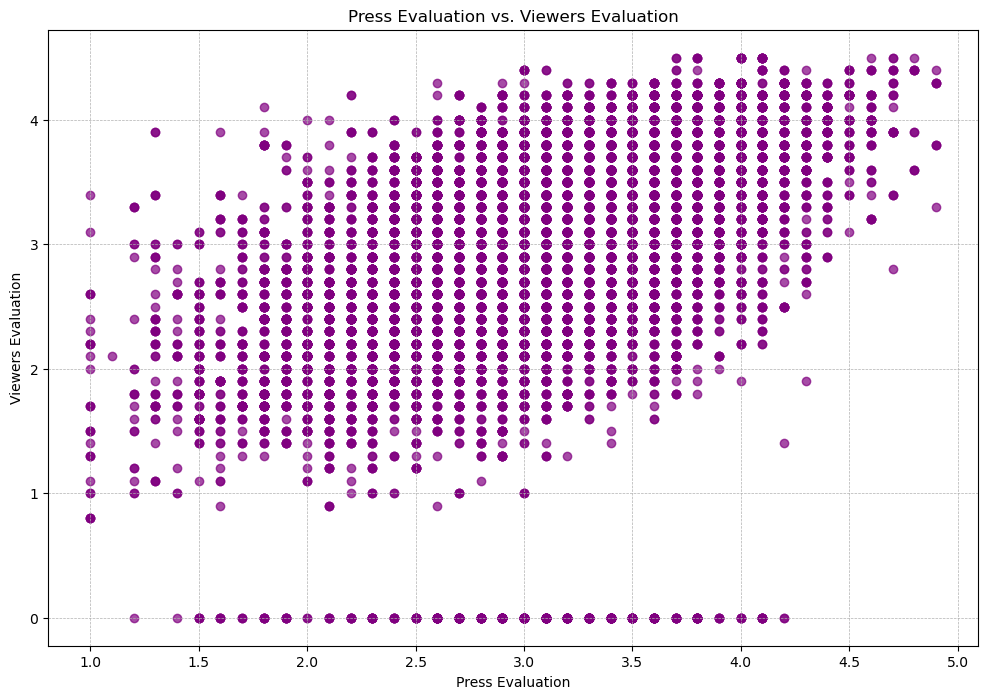

In [139]:

plt.figure(figsize=(12, 8))
plt.scatter(df['press_eval'], df['viewers_eval'], color='purple', alpha=0.7)
plt.title('Press Evaluation vs. Viewers Evaluation')
plt.xlabel('Press Evaluation')
plt.ylabel('Viewers Evaluation')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

In [140]:
# Supposons que df est votre DataFrame et 'col' est la colonne que vous souhaitez vérifier
viewers_null = df[df['viewers_eval'] == 0]

# Afficher le DataFrame filtré
viewers_null.value_counts()

title                                 release_date  genre               duration  director             producers                      cast                                                      nationality  distributor                   box_office_title   box_office_first_week  press_eval  viewers_eval  views    budget      duration_minutes  season     year
4:48                                  2017-02-22    Drame               1h 23min  Jacky Katu           Thomas Liégeard, Jacky Katu    David Chausse, Aurélie Houguenade, Jean-Marie Galey       France       Cinéma Saint-André des Arts   Box Office France  30                     2.5         0.0           10710.0  29000000.0  83                hiver      2017    1
nerkonda paarvai                      2019-08-08    Thriller            2h 30min  H. Vinoth            H. Vinoth                      Ajith Kumar, Shraddha Srinath, Vidya Balan                Inde         Night ed films                Box Office France  6582                   3.

In [141]:
df = df[df['viewers_eval'] != 0.0]

In [142]:
df.shape

(13250, 18)

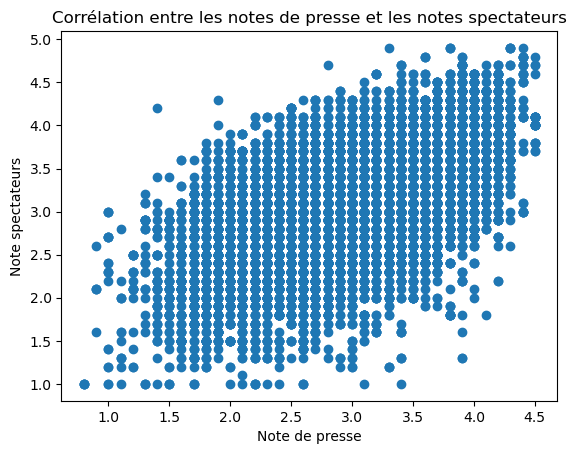

In [143]:
plt.scatter(df['viewers_eval'], df['press_eval'], alpha=1)
plt.xlabel('Note de presse')
plt.ylabel('Note spectateurs')
plt.title('Corrélation entre les notes de presse et les notes spectateurs')
plt.show()

#### Matrice de Corrélation

/tmp/ipykernel_194878/454669495.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


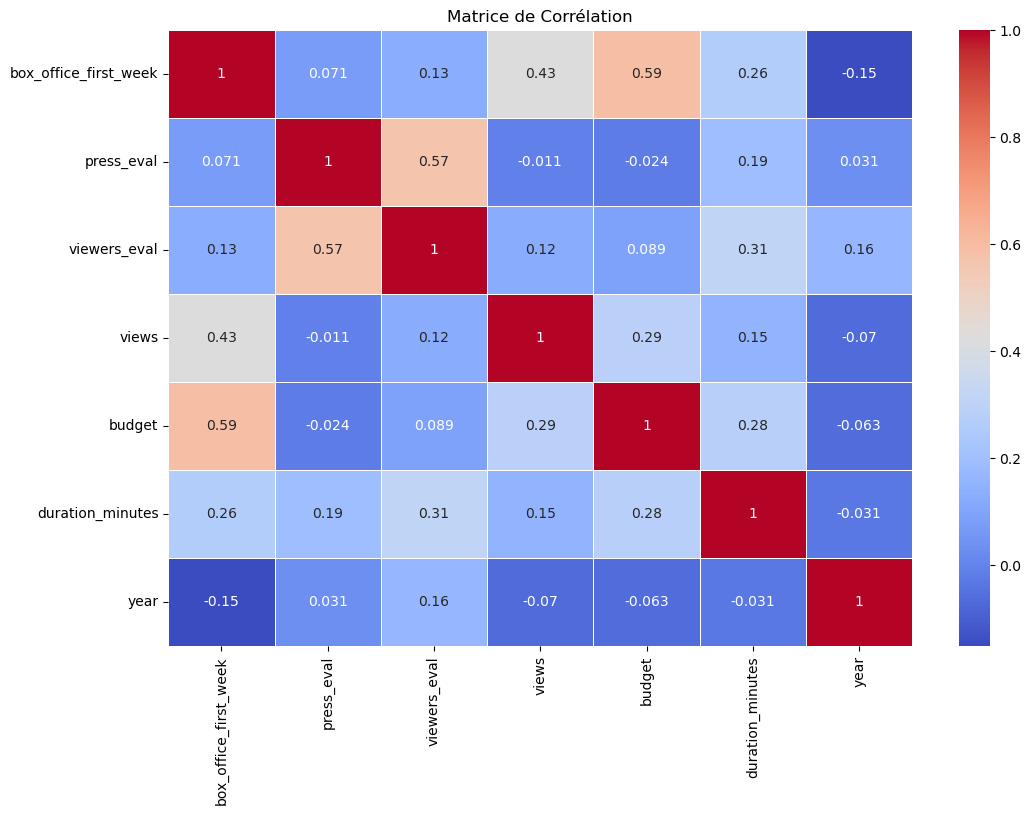

In [144]:
# Heatmap des corrélations
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

<AxesSubplot:>

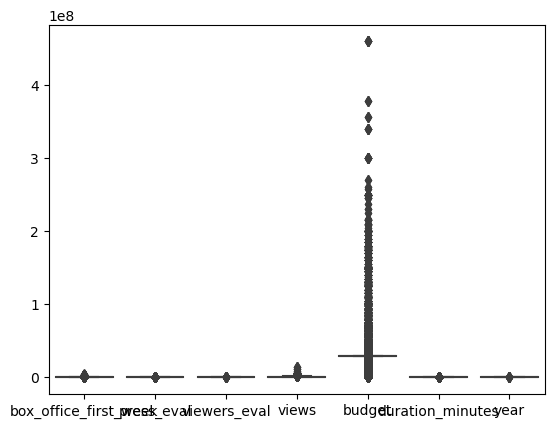

In [145]:
sns.boxplot(df)

<AxesSubplot:xlabel='box_office_first_week', ylabel='Count'>

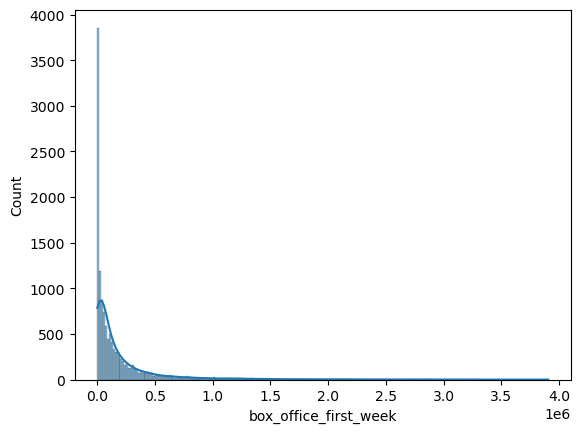

In [146]:
sns.histplot(df["box_office_first_week"], kde = True)

In [147]:
# Supposons que df est votre DataFrame et 'col' est la colonne que vous souhaitez vérifier
box_null = df.sort_values(by='box_office_first_week')

# Afficher le DataFrame filtré
box_null.head(10)

,title,release_date,genre,duration,director,producers,cast,nationality,distributor,box_office_title,box_office_first_week,press_eval,viewers_eval,views,budget,duration_minutes,season,year
8266,irmã,2021-07-07,Drame,1h 28min,Vinicius Lopes,"Luciana Mazeto, Luciana Mazeto, Vinicius Lopes","Maria Galant, Anaís Grala Wegner, Felipe Kanne...",Brésil,Wayna Pitch,Box Office France,4,2.8,2.7,53277.0,29000000.0,88,été,2021
7940,bob et les sex-pistaches,2013-04-24,Comédie,1h 23min,Yves Matthey,"Yves Matthey, Daniel Vouillamoz","Jules Sitruk, Alice Matthey, Maxime Kathari",Suisse,KapFilms,Box Office France,5,1.8,2.0,25186.0,29000000.0,83,printemps,2013
8985,un caballo llamado elefante,2018-04-04,Fantastique,1h 20min,Andrés Waissbluth,"Andrés Waissbluth, Miguel Ángel Labarca","Tomas Arriagada, Joaquin Saldana, Ana Sofía Du...",Chili,Bobine Films,Box Office France,12,2.0,2.5,2342.0,29000000.0,80,printemps,2018
8985,un caballo llamado elefante,2018-04-04,Aventure,1h 20min,Andrés Waissbluth,"Andrés Waissbluth, Miguel Ángel Labarca","Tomas Arriagada, Joaquin Saldana, Ana Sofía Du...",Chili,Bobine Films,Box Office France,12,2.0,2.5,2342.0,29000000.0,80,printemps,2018
7698,take me somewhere nice,2021-07-14,Drame,1h 31min,Ena Sendijarević,Ena Sendijarević,"Sara Luna Zorić, Lazar Dragojević, Ernad Prnja...",Pays-Bas,Sonata Films,Box Office France,13,2.5,3.0,5164.0,29000000.0,91,été,2021
8944,ärtico,2015-11-11,Drame,1h 18min,Gabriel Velázquez,"Gabriel Velázquez, Carlos Unamuno","Víctor García (V), Juanlu Sevillano, Débora Bo...",Espagne,Bobine Films,Box Office France,15,3.2,2.8,3921.0,29000000.0,78,automne,2015
7281,gutland,2018-11-28,Thriller,1h 47min,Govinda Van Maele,Govinda Van Maele,"Frederick Lau, Vicky Krieps, Marco Lorenzini",Luxembourg,Next Film Distribution,Box Office France,16,2.6,2.8,5881.0,29000000.0,107,automne,2018
7281,gutland,2018-11-28,Drame,1h 47min,Govinda Van Maele,Govinda Van Maele,"Frederick Lau, Vicky Krieps, Marco Lorenzini",Luxembourg,Next Film Distribution,Box Office France,16,2.6,2.8,5881.0,29000000.0,107,automne,2018
8707,merci les jeunes,2015-11-04,Comédie dramatique,1h 21min,Jérôme Polidor,Jérôme Polidor,"Théo Costa-Marini, Amina Zouiten, Bellamine Ab...",France,La Mare Distribution,Box Office France,16,3.3,3.2,7510.0,29000000.0,81,automne,2015
2299,heartbeast,2023-02-22,Drame,1h 43min,Aino Suni,Aino Suni,"Elsi Sloan, Carmen Kassovitz, Lucille Guillaume",France,Wayna Pitch,Box Office France,18,2.8,2.6,4885.0,2434000.0,103,hiver,2023


In [148]:
df.describe()

,box_office_first_week,press_eval,viewers_eval,views,budget,duration_minutes,year
count,1.325000e+04,13250.000000,13250.000000,1.325000e+04,1.325000e+04,13250.000000,13250.000000
mean,1.961891e+05,3.096981,3.048921,4.247208e+05,3.908894e+07,105.196151,2013.145057
std,3.640960e+05,0.646968,0.688802,6.677992e+05,4.101409e+07,19.195333,6.183041
min,4.000000e+00,1.000000,0.800000,6.100000e+01,1.000000e+00,24.000000,1950.000000
25%,1.181300e+04,2.700000,2.600000,7.193650e+04,2.900000e+07,93.000000,2009.000000
50%,6.573900e+04,3.100000,3.100000,2.138490e+05,2.900000e+07,102.000000,2014.000000
75%,2.100910e+05,3.500000,3.600000,5.080470e+05,2.900000e+07,115.000000,2018.000000
max,3.906694e+06,4.900000,4.500000,1.354188e+07,4.600000e+08,543.000000,2023.000000


<AxesSubplot:xlabel='box_office_first_week', ylabel='Count'>

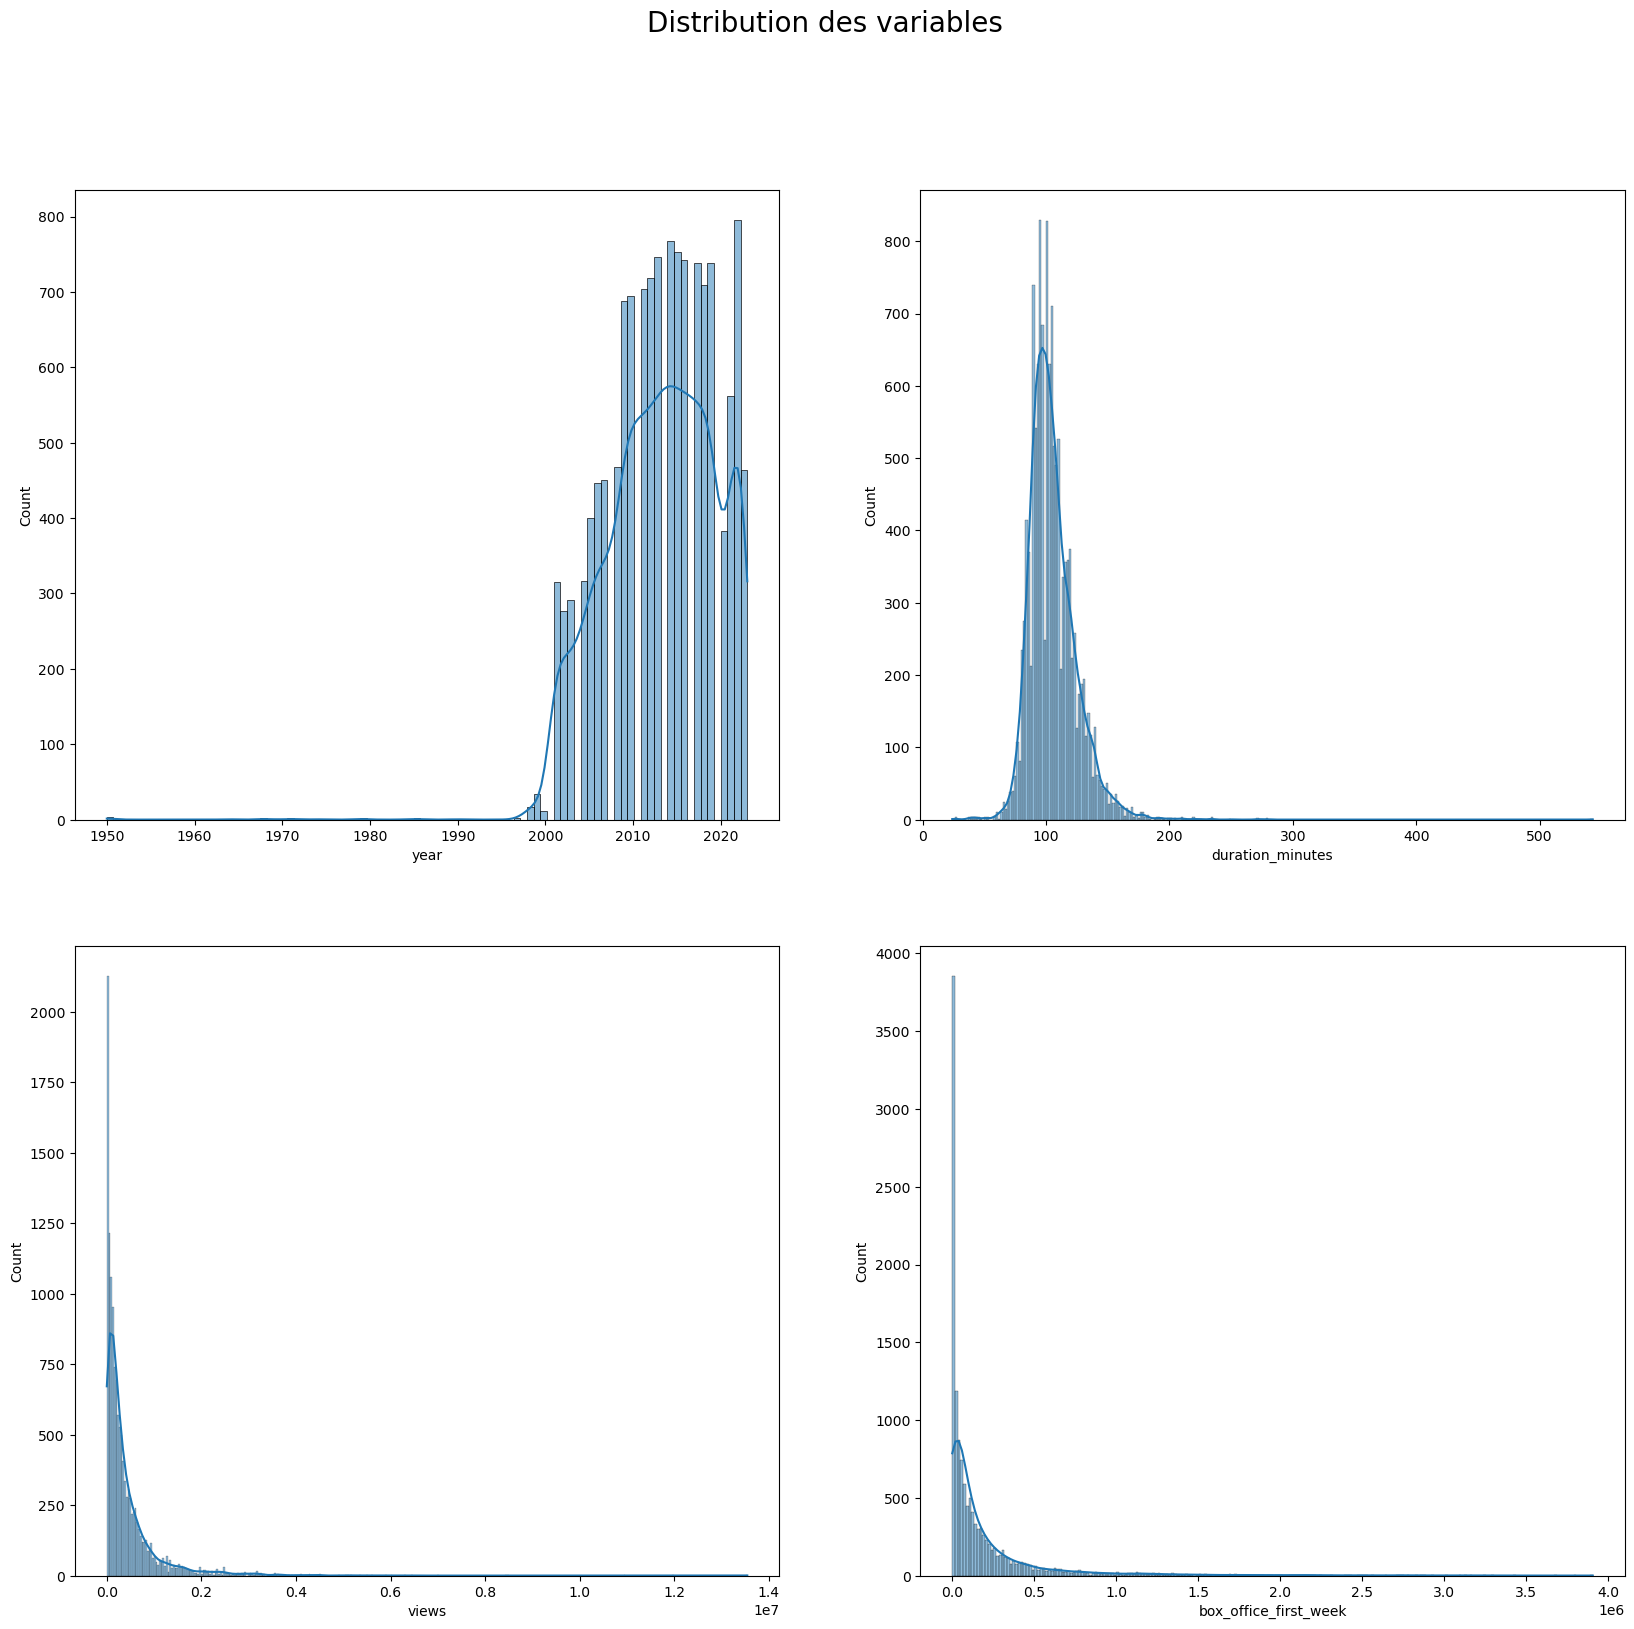

In [149]:
fig, ax = plt.subplots(2,2, figsize = (20,18))
plt.suptitle("Distribution des variables", fontsize = 20)
sns.histplot(ax=ax[0,0], x="year", data=df, kde = True)
sns.histplot(ax=ax[0,1], x="duration_minutes", data=df, kde = True)
sns.histplot(ax=ax[1,0], x="views", data=df, kde = True)
sns.histplot(ax=ax[1,1], x="box_office_first_week", data=df, kde = True)

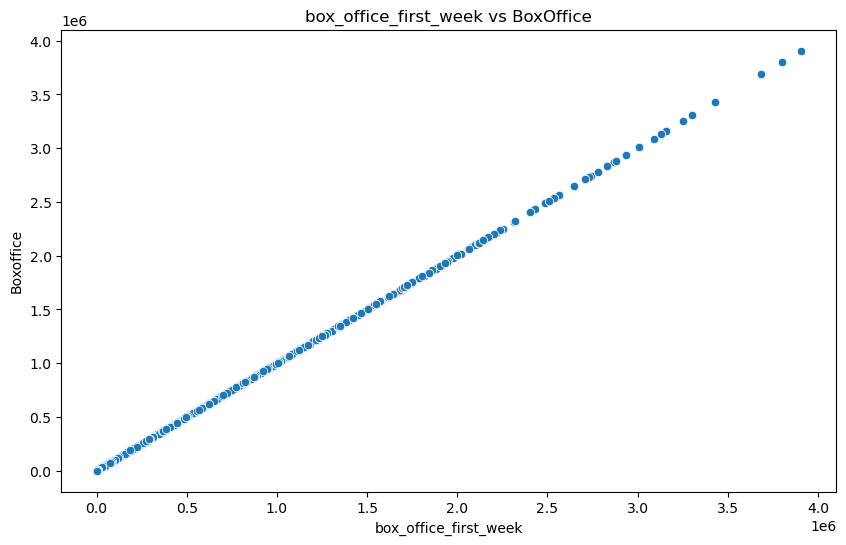

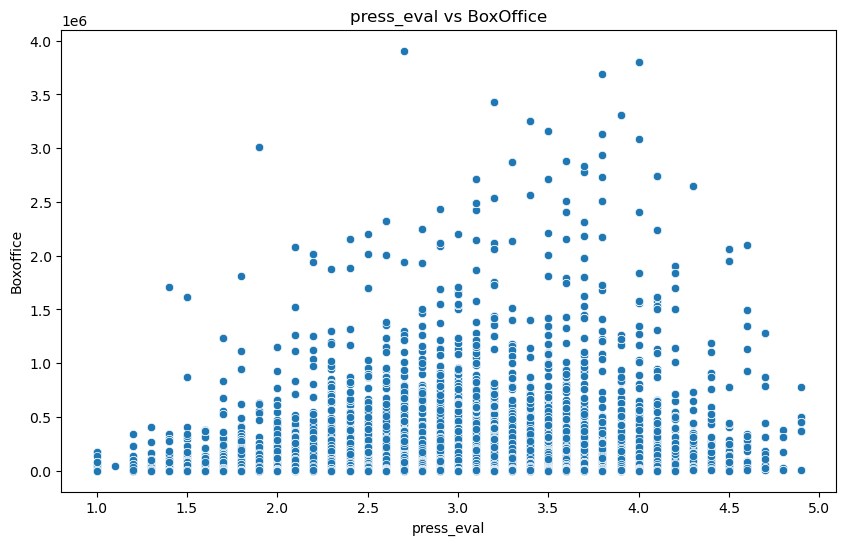

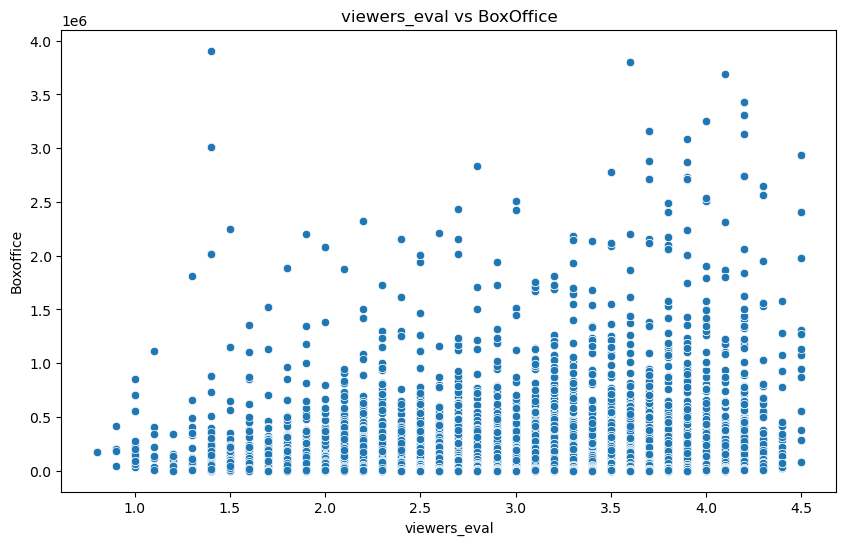

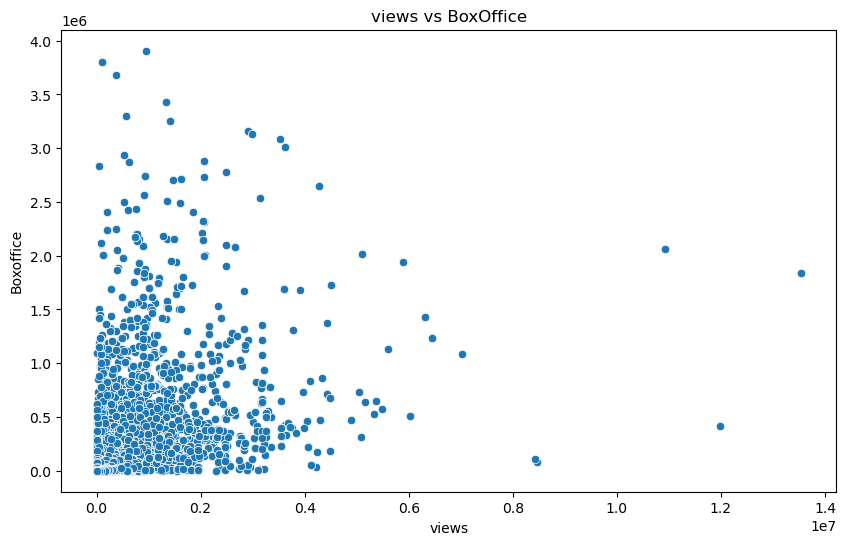

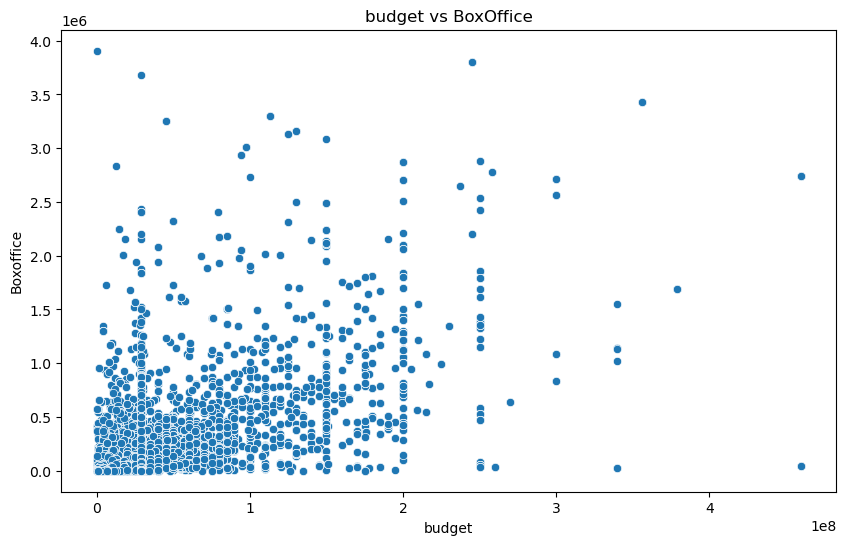

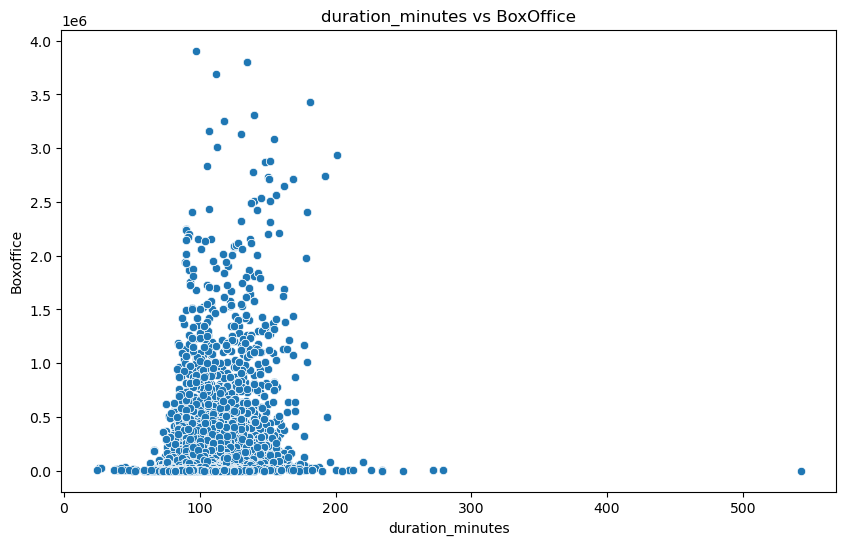

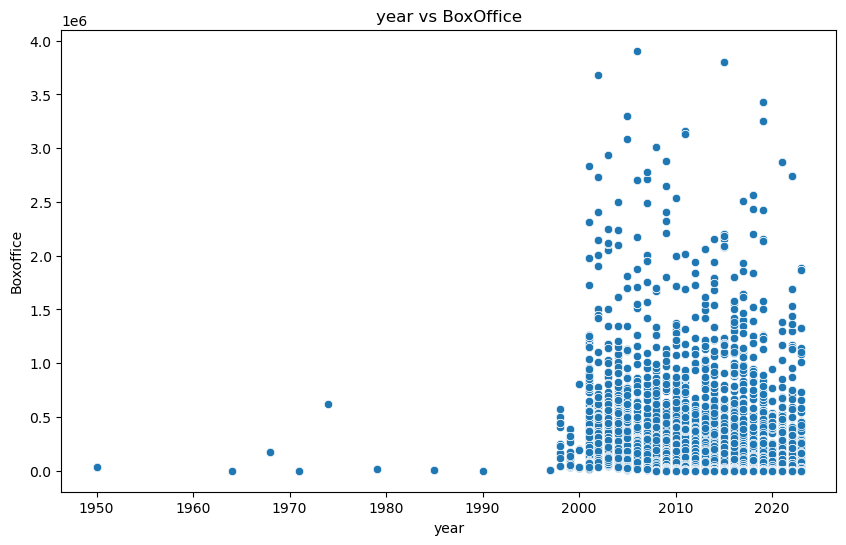

In [150]:
# Analyse bivariée des variables numériques
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=col, y='box_office_first_week', data=df)
    plt.title(f'{col} vs BoxOffice')
    plt.xlabel(col)
    plt.ylabel('Boxoffice')
    plt.show()

### Feature Engineering

In [151]:
# Convertir toutes les valeurs de la colonne "genre" en minuscules et supprimer les espaces en début et en fin
df['genre'] = df['genre'].str.lower().str.strip()

# Supprimer les espaces entre les genres
df['genre'] = df['genre'].str.replace(', ', ',')

# Encodage du genre
genre_encoding = df['genre'].str.get_dummies(sep=',')
genre_encoding.columns = ['' + col for col in genre_encoding.columns]

# Concaténation des DataFrames d'encodage avec le DataFrame principal
df = pd.concat([df, genre_encoding], axis=1)

In [152]:
df_stars = pd.read_csv('stars.csv')

In [153]:
df['cast'] = df['cast'].apply(lambda x: [actor.strip() for actor in x.split(',')])
df['producers'] = df['producers'].apply(lambda x: [actor.strip() for actor in x.split(',')])
df['director'] = df['director'].apply(lambda x: [actor.strip() for actor in x.split(',')])
df['distributor'] = df['distributor'].apply(lambda x: [actor.strip() for actor in x.split(',')])

In [154]:
stars = df_stars['name'].to_list()

In [155]:
def count_stars(cast):
    count = 0
    for actor in cast:
        if actor in stars:
            count += 1
    return count 

In [156]:
df['proportion_stars_actors'] = (df['cast'].apply(count_stars)/df['cast'].apply(len)).round(2)
df['proportion_stars_producers'] = (df['producers'].apply(count_stars)/df['producers'].apply(len)).round(2)
df['proportion_stars_director'] = df['director'].apply(count_stars)
df['stars_producers_director'] = df['proportion_stars_producers'] + df['proportion_stars_director']

In [157]:
# # Charger le fichier "top_acteur.csv" contenant les acteurs connus dans un DataFrame
df_acteurs_connus = pd.read_csv('top_acteurs.csv')

In [158]:
# Créer un ensemble de noms d'acteurs connus à partir de la base de données des acteurs connus
acteurs_connus = set(df_acteurs_connus['acteur'])

# Fonction pour compter le nombre d'acteurs connus dans une liste d'acteurs
def compter_acteurs_connus(liste_acteurs):
    return len([acteur for acteur in liste_acteurs if acteur in acteurs_connus])

# Appliquer la fonction pour créer la colonne 'nombre_acteurs_connus'
df['nombre_acteurs_connus'] = df['cast'].apply(compter_acteurs_connus)

In [159]:
# df['acteurs_connus'] = df['nombre_acteurs_connus'].apply(lambda x: bool(x)).astype(bool)

In [160]:
df

,title,release_date,genre,duration,director,producers,cast,nationality,distributor,box_office_title,box_office_first_week,press_eval,viewers_eval,views,budget,duration_minutes,season,year,action,animation,arts martiaux,aventure,biopic,bollywood,comédie,comédie dramatique,comédie musicale,divers,drame,epouvante-horreur,erotique,espionnage,expérimental,famille,fantastique,guerre,historique,judiciaire,musical,policier,péplum,romance,science fiction,sport event,thriller,western,proportion_stars_actors,proportion_stars_producers,proportion_stars_director,stars_producers_director,nombre_acteurs_connus
0,guardians of the galaxy vol. 3,2023-05-03,action,2h 30min,[James Gunn],[James Gunn],"[Chris Pratt, Zoe Saldana, Dave Bautista]",U.S.A.,[The Walt Disney Company France],Box Office France,1323124,3.6,4.2,251776.0,250000000.0,150,printemps,2023,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.67,0.0,0,0.0,2
0,guardians of the galaxy vol. 3,2023-05-03,fantastique,2h 30min,[James Gunn],[James Gunn],"[Chris Pratt, Zoe Saldana, Dave Bautista]",U.S.A.,[The Walt Disney Company France],Box Office France,1323124,3.6,4.2,251776.0,250000000.0,150,printemps,2023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.67,0.0,0,0.0,2
0,guardians of the galaxy vol. 3,2023-05-03,science fiction,2h 30min,[James Gunn],[James Gunn],"[Chris Pratt, Zoe Saldana, Dave Bautista]",U.S.A.,[The Walt Disney Company France],Box Office France,1323124,3.6,4.2,251776.0,250000000.0,150,printemps,2023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.67,0.0,0,0.0,2
1,sexygénaires,2023-06-14,comédie,1h 20min,[Robin Sykes],"[Antoine Raimbault, Robin Sykes]","[Thierry Lhermitte, Patrick Timsit, Marie Bunel]",France,[Apollo Films / Orange Studio],Box Office France,63084,2.8,2.6,25555.0,6000000.0,80,été,2023,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.33,0.0,0,0.0,1
2,pornomelancolía,2023-06-21,drame,1h 34min,[Manuel Abramovich],"[Manuel Abramovich, Fernando Krapp]","[Lalo Santos, Diablo, Brandon Ley]",Argentine,[Epicentre Films],Box Office France,3611,3.5,2.6,6778.0,29000000.0,94,été,2023,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9110,le murmure des ruines,2013-06-26,drame,1h 33min,[Liliane de Kermadec],[Liliane de Kermadec],"[Ruben Verdyan, Sarassar Sarayan, Hovhanès Kho...",France,[107 entrées],Box Office France,152,2.6,3.0,310.0,29000000.0,93,été,2013,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0,0.0,0
9112,bends,2015-07-15,drame,1h 32min,[Flora Lau],"[Carina Lau, Flora Lau]","[Carina Lau, Kun Chen, Yuan Tian]",Hong-Kong,[A3 Distribution],Box Office France,826,2.9,3.1,5669.0,29000000.0,92,été,2015,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0,0.0,0
9113,not in tel-aviv,2013-06-05,comédie,1h 22min,[Nony Geffen],[Nony Geffen],"[Nony Geffen, Romi Aboulafia, Yaara Pelzig]",Israël,[Arizona Distribution],Box Office France,282,2.6,2.6,3212.0,29000000.0,82,été,2013,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0,0.0,0
9113,not in tel-aviv,2013-06-05,policier,1h 22min,[Nony Geffen],[Nony Geffen],"[Nony Geffen, Romi Aboulafia, Yaara Pelzig]",Israël,[Arizona Distribution],Box Office France,282,2.6,2.6,3212.0,29000000.0,82,été,2013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.00,0.0,0,0.0,0


In [161]:
# from collections import Counter

# # Supposons que votre DataFrame s'appelle df_cleaned et la colonne des distributeurs est 'distributor'

# # Étape 1 : Utiliser explode pour diviser les distributeurs en des distributeurs individuels
# df_exploded = df.explode('distributor')

# # Étape 2 : Utiliser value_counts pour compter le nombre d'occurrences de chaque distributeur
# distributor_counts = df_exploded['distributor'].value_counts()
# # Étape 3 : Calculer la fréquence des distributeurs 
# distributor_frequency = distributor_counts

# import pandas as pd



# # Étape 3 : Créer le DataFrame avec les fréquences des distributeurs
# df_distrib = pd.DataFrame({'distributor': distributor_counts.index, 'frequency': distributor_counts.values})

# # Renommer les colonnes du DataFrame
# df_distrib.rename(columns={'Unnamed: 0': 'distributor', 0: 'frequency'}, inplace=True)

# # Sauvegarder le DataFrame dans un fichier CSV
# df_distrib.to_csv('df_distrib.csv', index=False)



# # Étape 4 : Créer un dictionnaire pour mapper la fréquence à chaque distributeur
# distributor_freq_dict = distributor_frequency.to_dict()

# # Étape 5 : Mapper la fréquence à chaque ligne du DataFrame et calculer la moyenne s'il y a plusieurs distributeurs
# def calculate_avg_frequency(distributors):
#     if isinstance(distributors, list):
#         return sum([distributor_freq_dict[d] for d in distributors]) / len(distributors)
#     else:
#         return distributor_freq_dict[distributors]

# df['distributor_avg_frequency'] = df['distributor'].apply(calculate_avg_frequency)

In [162]:
# Supposons que votre DataFrame s'appelle df_cleaned et la colonne des distributeurs est 'distributor'

# Étape 1 : Utiliser explode pour diviser les distributeurs en des distributeurs individuels
df_exploded = df.explode('distributor')

# Étape 2 : Utiliser value_counts pour compter le nombre d'occurrences de chaque distributeur
distributor_counts = df_exploded['distributor'].value_counts()

# Définir le seuil d'importance (par exemple, un distributeur est important s'il distribue plus de 10 films)
importance_threshold = 10

# Étape 3 : Créer un DataFrame avec les fréquences des distributeurs
df_distrib = pd.DataFrame({'distributor': distributor_counts.index, 'frequency': distributor_counts.values})

# Ajouter une colonne 'important' basée sur le seuil d'importance
df_distrib['important'] = df_distrib['frequency'] > importance_threshold

# Sauvegarder le DataFrame dans un fichier CSV
df_distrib.to_csv('df_distrib.csv', index=False)

# Étape 4 : Créer un dictionnaire pour mapper l'importance à chaque distributeur
distributor_importance_dict = df_distrib.set_index('distributor')['important'].to_dict()

# Étape 5 : Mapper l'importance à chaque ligne du DataFrame
def is_important(distributors):
    if isinstance(distributors, list):
        # Si la ligne contient plusieurs distributeurs, nous considérons important si au moins un est important
        return any(distributor_importance_dict.get(d, False) for d in distributors)
    else:
        return distributor_importance_dict.get(distributors, False)

# Ajouter une nouvelle colonne 'distributor_important' au DataFrame original
df['distributor_important'] = df['distributor'].apply(is_important)

# Afficher le DataFrame final
print(df)

                               title release_date            genre  duration  \
0     guardians of the galaxy vol. 3   2023-05-03           action  2h 30min   
0     guardians of the galaxy vol. 3   2023-05-03      fantastique  2h 30min   
0     guardians of the galaxy vol. 3   2023-05-03  science fiction  2h 30min   
1                       sexygénaires   2023-06-14          comédie  1h 20min   
2                    pornomelancolía   2023-06-21            drame  1h 34min   
...                              ...          ...              ...       ...   
9110           le murmure des ruines   2013-06-26            drame  1h 33min   
9112                           bends   2015-07-15            drame  1h 32min   
9113                 not in tel-aviv   2013-06-05          comédie  1h 22min   
9113                 not in tel-aviv   2013-06-05         policier  1h 22min   
9113                 not in tel-aviv   2013-06-05            drame  1h 22min   

                   director            

In [163]:
df.columns

Index(['title', 'release_date', 'genre', 'duration', 'director', 'producers',
       'cast', 'nationality', 'distributor', 'box_office_title',
       'box_office_first_week', 'press_eval', 'viewers_eval', 'views',
       'budget', 'duration_minutes', 'season', 'year', 'action', 'animation',
       'arts martiaux', 'aventure', 'biopic', 'bollywood', 'comédie',
       'comédie dramatique', 'comédie musicale', 'divers', 'drame',
       'epouvante-horreur', 'erotique', 'espionnage', 'expérimental',
       'famille', 'fantastique', 'guerre', 'historique', 'judiciaire',
       'musical', 'policier', 'péplum', 'romance', 'science fiction',
       'sport event', 'thriller', 'western', 'proportion_stars_actors',
       'proportion_stars_producers', 'proportion_stars_director',
       'stars_producers_director', 'nombre_acteurs_connus',
       'distributor_important'],
      dtype='object')

In [164]:
df = df.drop(['genre', 'box_office_title', 'release_date', 'duration', 'distributor', 'views', 'cast', 'director', 'producers', 'proportion_stars_actors', 'proportion_stars_producers',
       'proportion_stars_director',],axis=1)

In [165]:
df['distributor_important'] = df['distributor_important'].astype(bool)

In [166]:
df['stars_producers_director'].unique

<bound method Series.unique of 0       0.0
0       0.0
0       0.0
1       0.0
2       0.0
       ... 
9110    0.0
9112    0.0
9113    0.0
9113    0.0
9113    0.0
Name: stars_producers_director, Length: 13250, dtype: float64>

In [167]:
df.shape

(13250, 40)

In [168]:
df.head()

,title,nationality,box_office_first_week,press_eval,viewers_eval,budget,duration_minutes,season,year,action,animation,arts martiaux,aventure,biopic,bollywood,comédie,comédie dramatique,comédie musicale,divers,drame,epouvante-horreur,erotique,espionnage,expérimental,famille,fantastique,guerre,historique,judiciaire,musical,policier,péplum,romance,science fiction,sport event,thriller,western,stars_producers_director,nombre_acteurs_connus,distributor_important
0,guardians of the galaxy vol. 3,U.S.A.,1323124,3.6,4.2,250000000.0,150,printemps,2023,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2,True
0,guardians of the galaxy vol. 3,U.S.A.,1323124,3.6,4.2,250000000.0,150,printemps,2023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,2,True
0,guardians of the galaxy vol. 3,U.S.A.,1323124,3.6,4.2,250000000.0,150,printemps,2023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,2,True
1,sexygénaires,France,63084,2.8,2.6,6000000.0,80,été,2023,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,False
2,pornomelancolía,Argentine,3611,3.5,2.6,29000000.0,94,été,2023,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,True


In [172]:
df.to_csv('data_film_model.csv')

In [170]:
# import requests
# data_cleaned = {
#   "nationality": "France",
#   "duration_minutes": 90,
#   "season": "hiver",
#   "genre": "action",
#   "nombre_acteurs_connus": 2,
#   "distributor_important": "True"
# }
# response = requests.post("http://127.0.0.1:8000/predict", json=data_cleaned)



In [171]:
# response.status_code